In [1]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="")
project = rf.workspace("detectoreyesdisease").project("eye-disease-detection-nqgv6")
version = project.version(1) 
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eye-disease-detection-1 in yolov11:: 100%|██████████| 1179/1179 [00:00<00:00, 8912.34it/s]


In [4]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 357MB/s]
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/eye-disease-detection-1/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [35]:
from IPython.display import Image

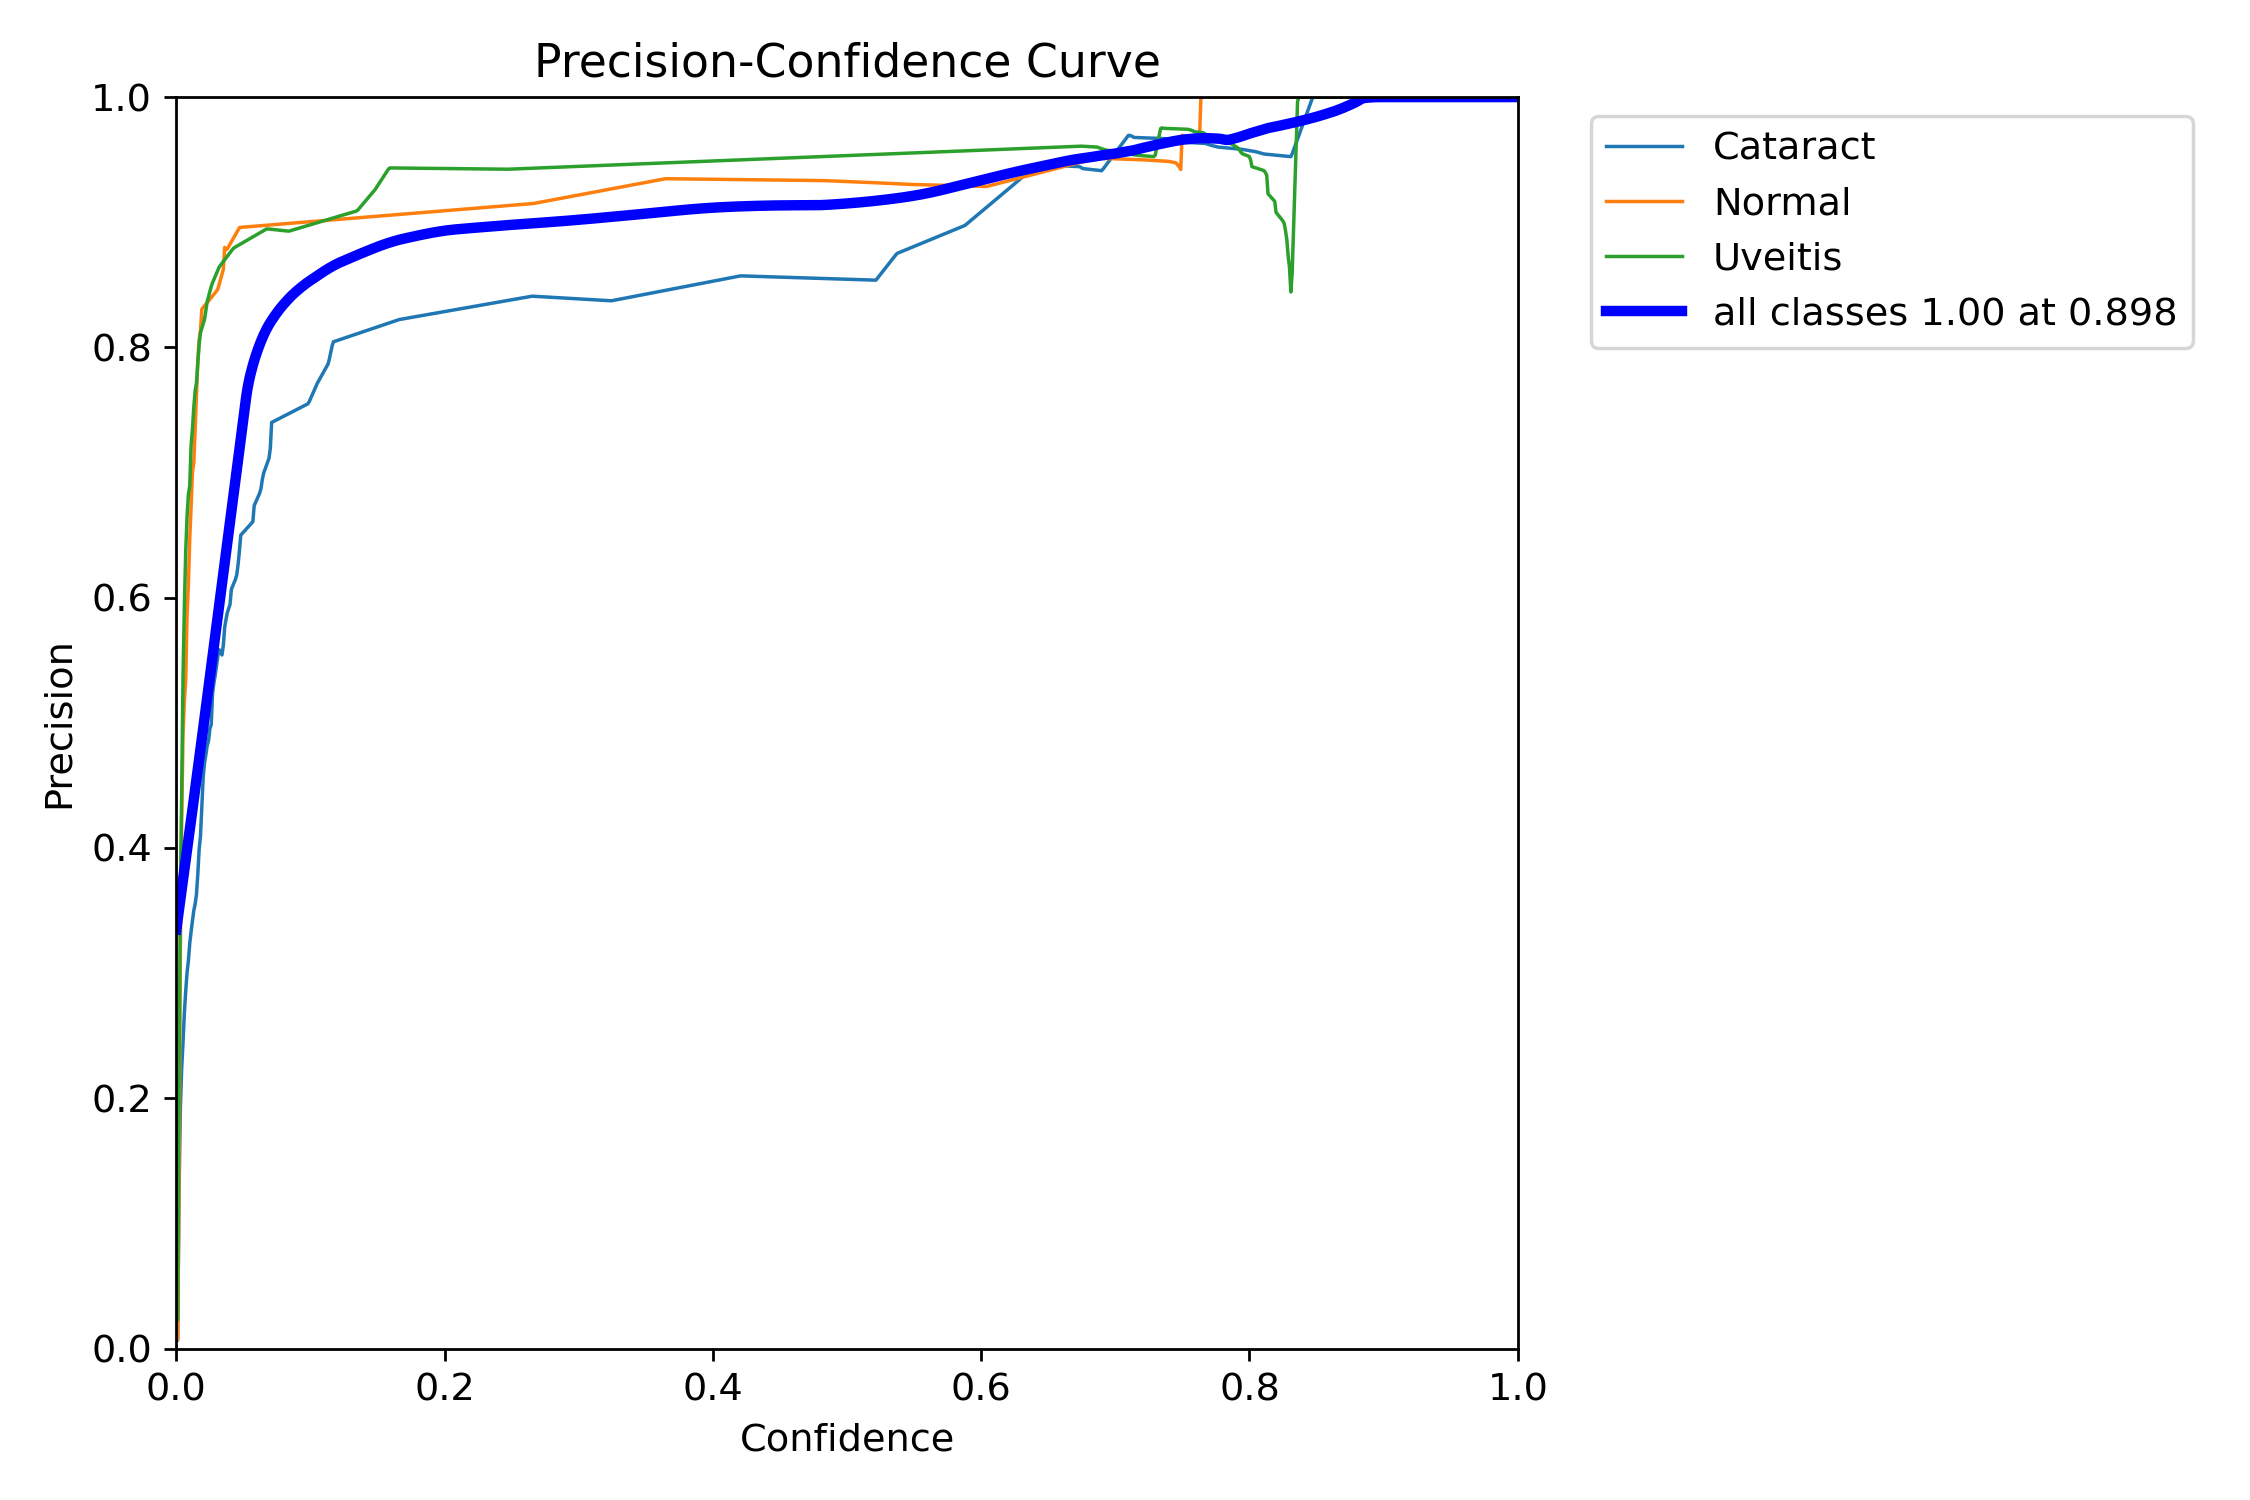

In [8]:
Image("/content/runs/detect/train/P_curve.png", width=600)

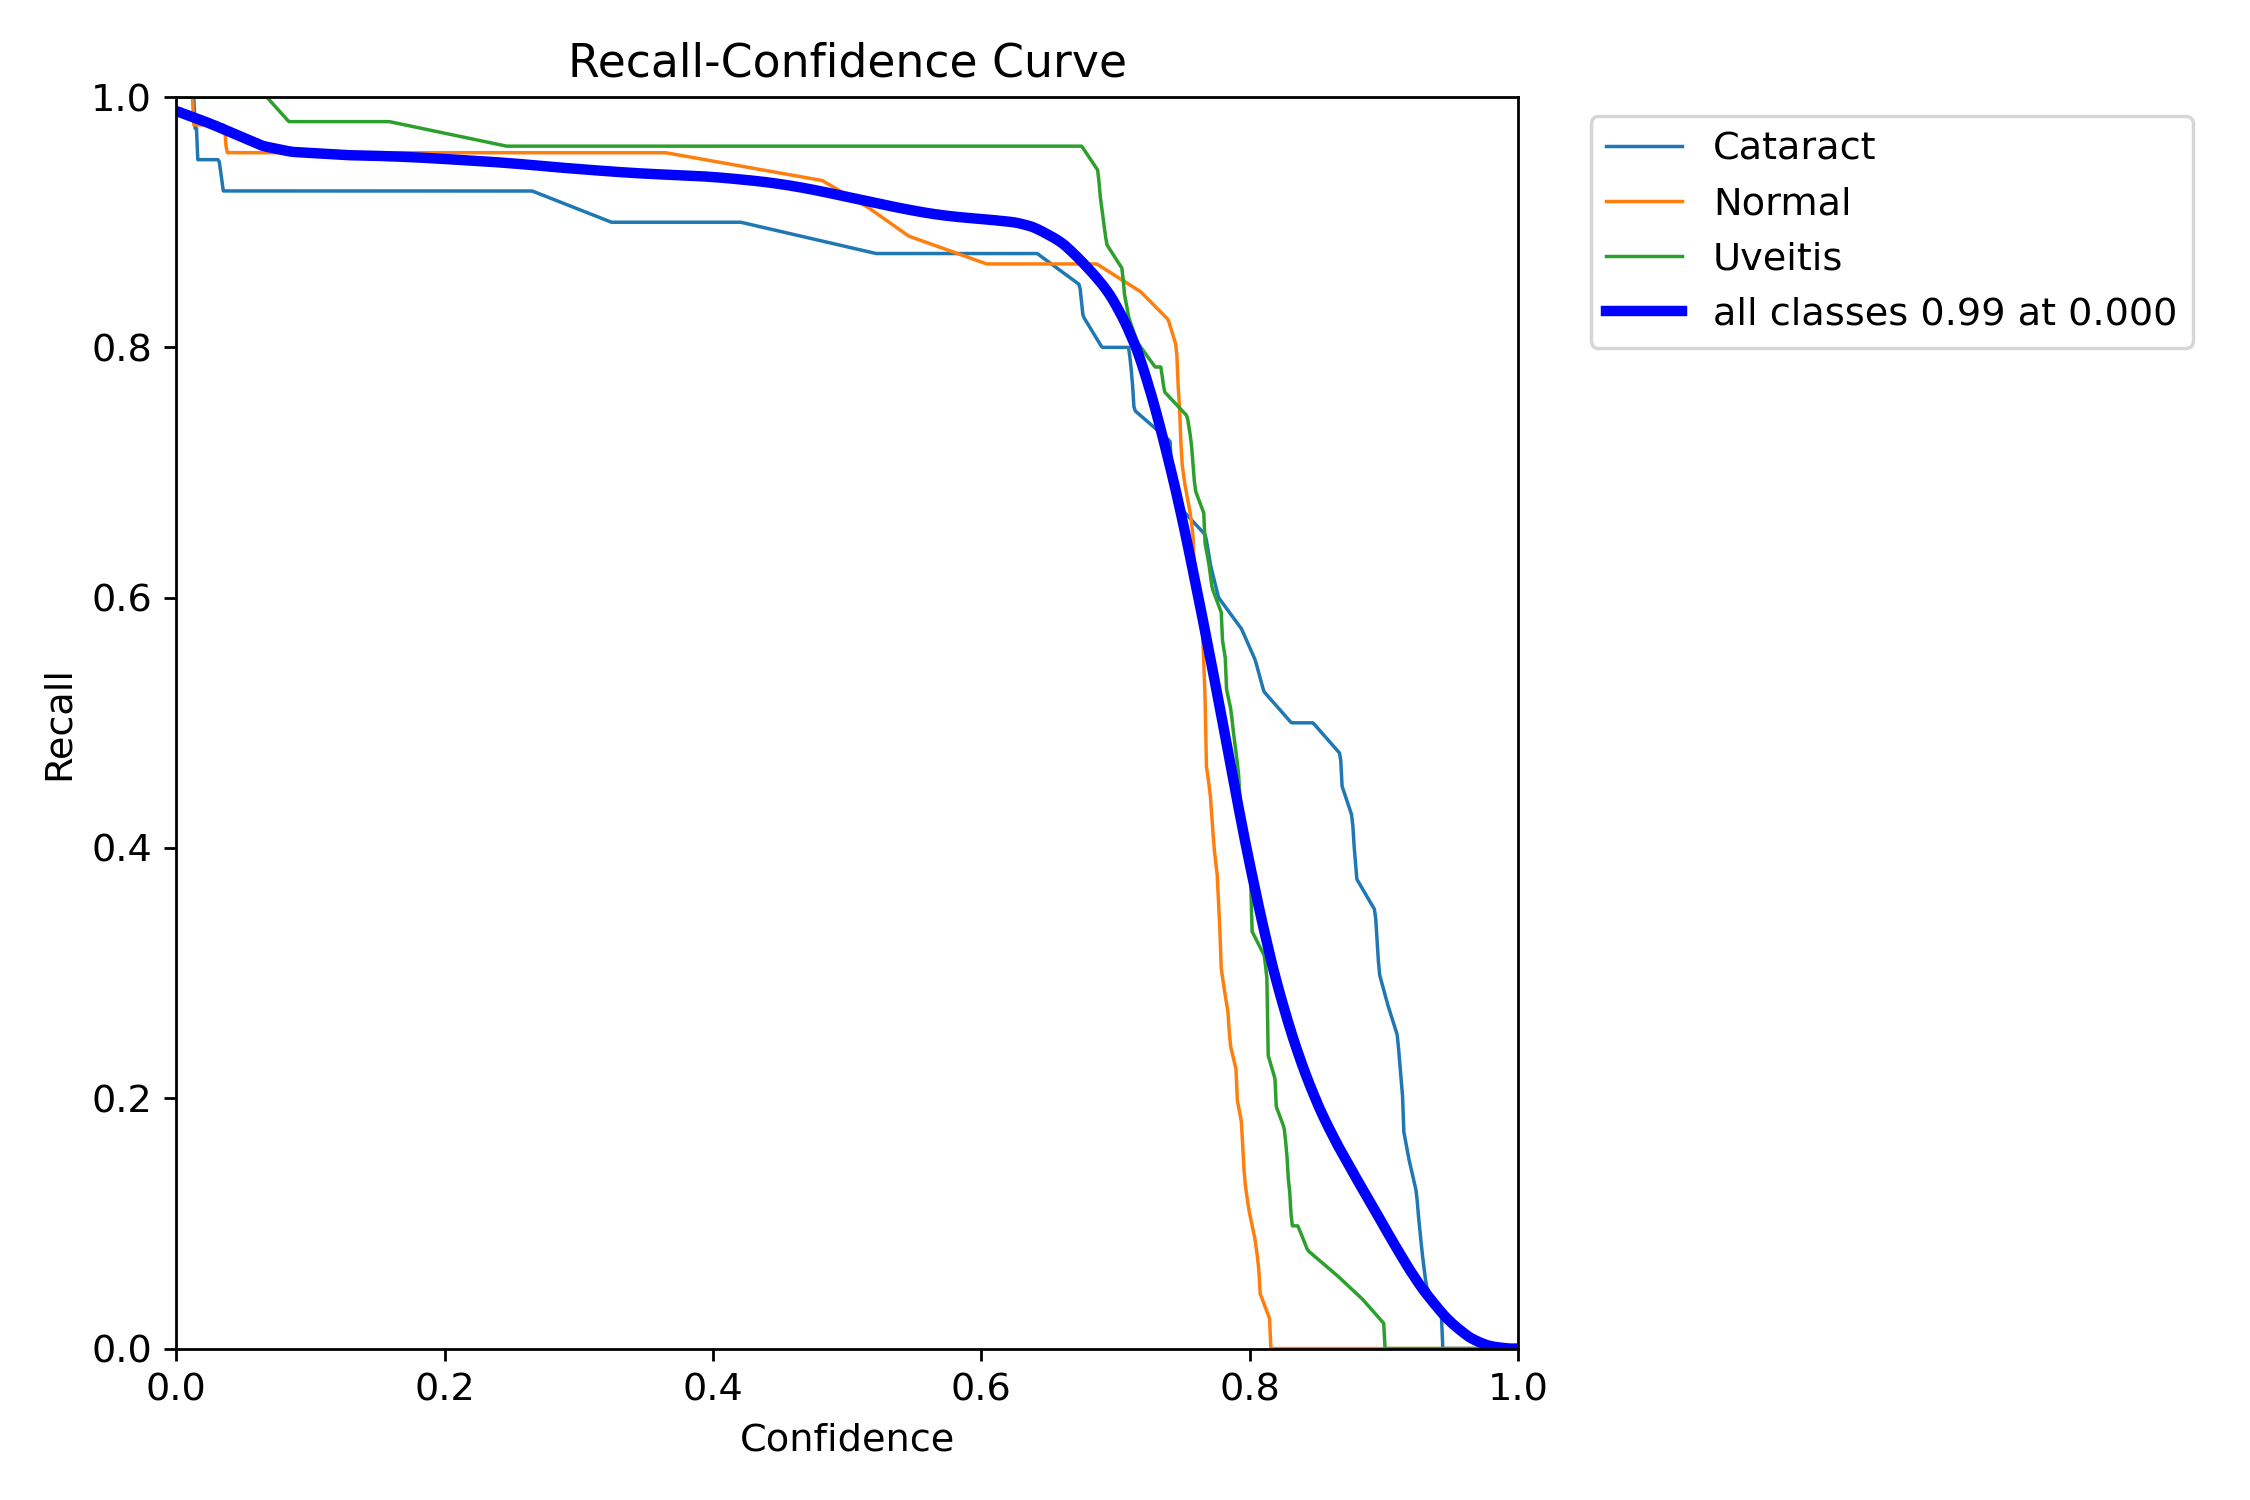

In [9]:
Image("/content/runs/detect/train/R_curve.png", width=600)


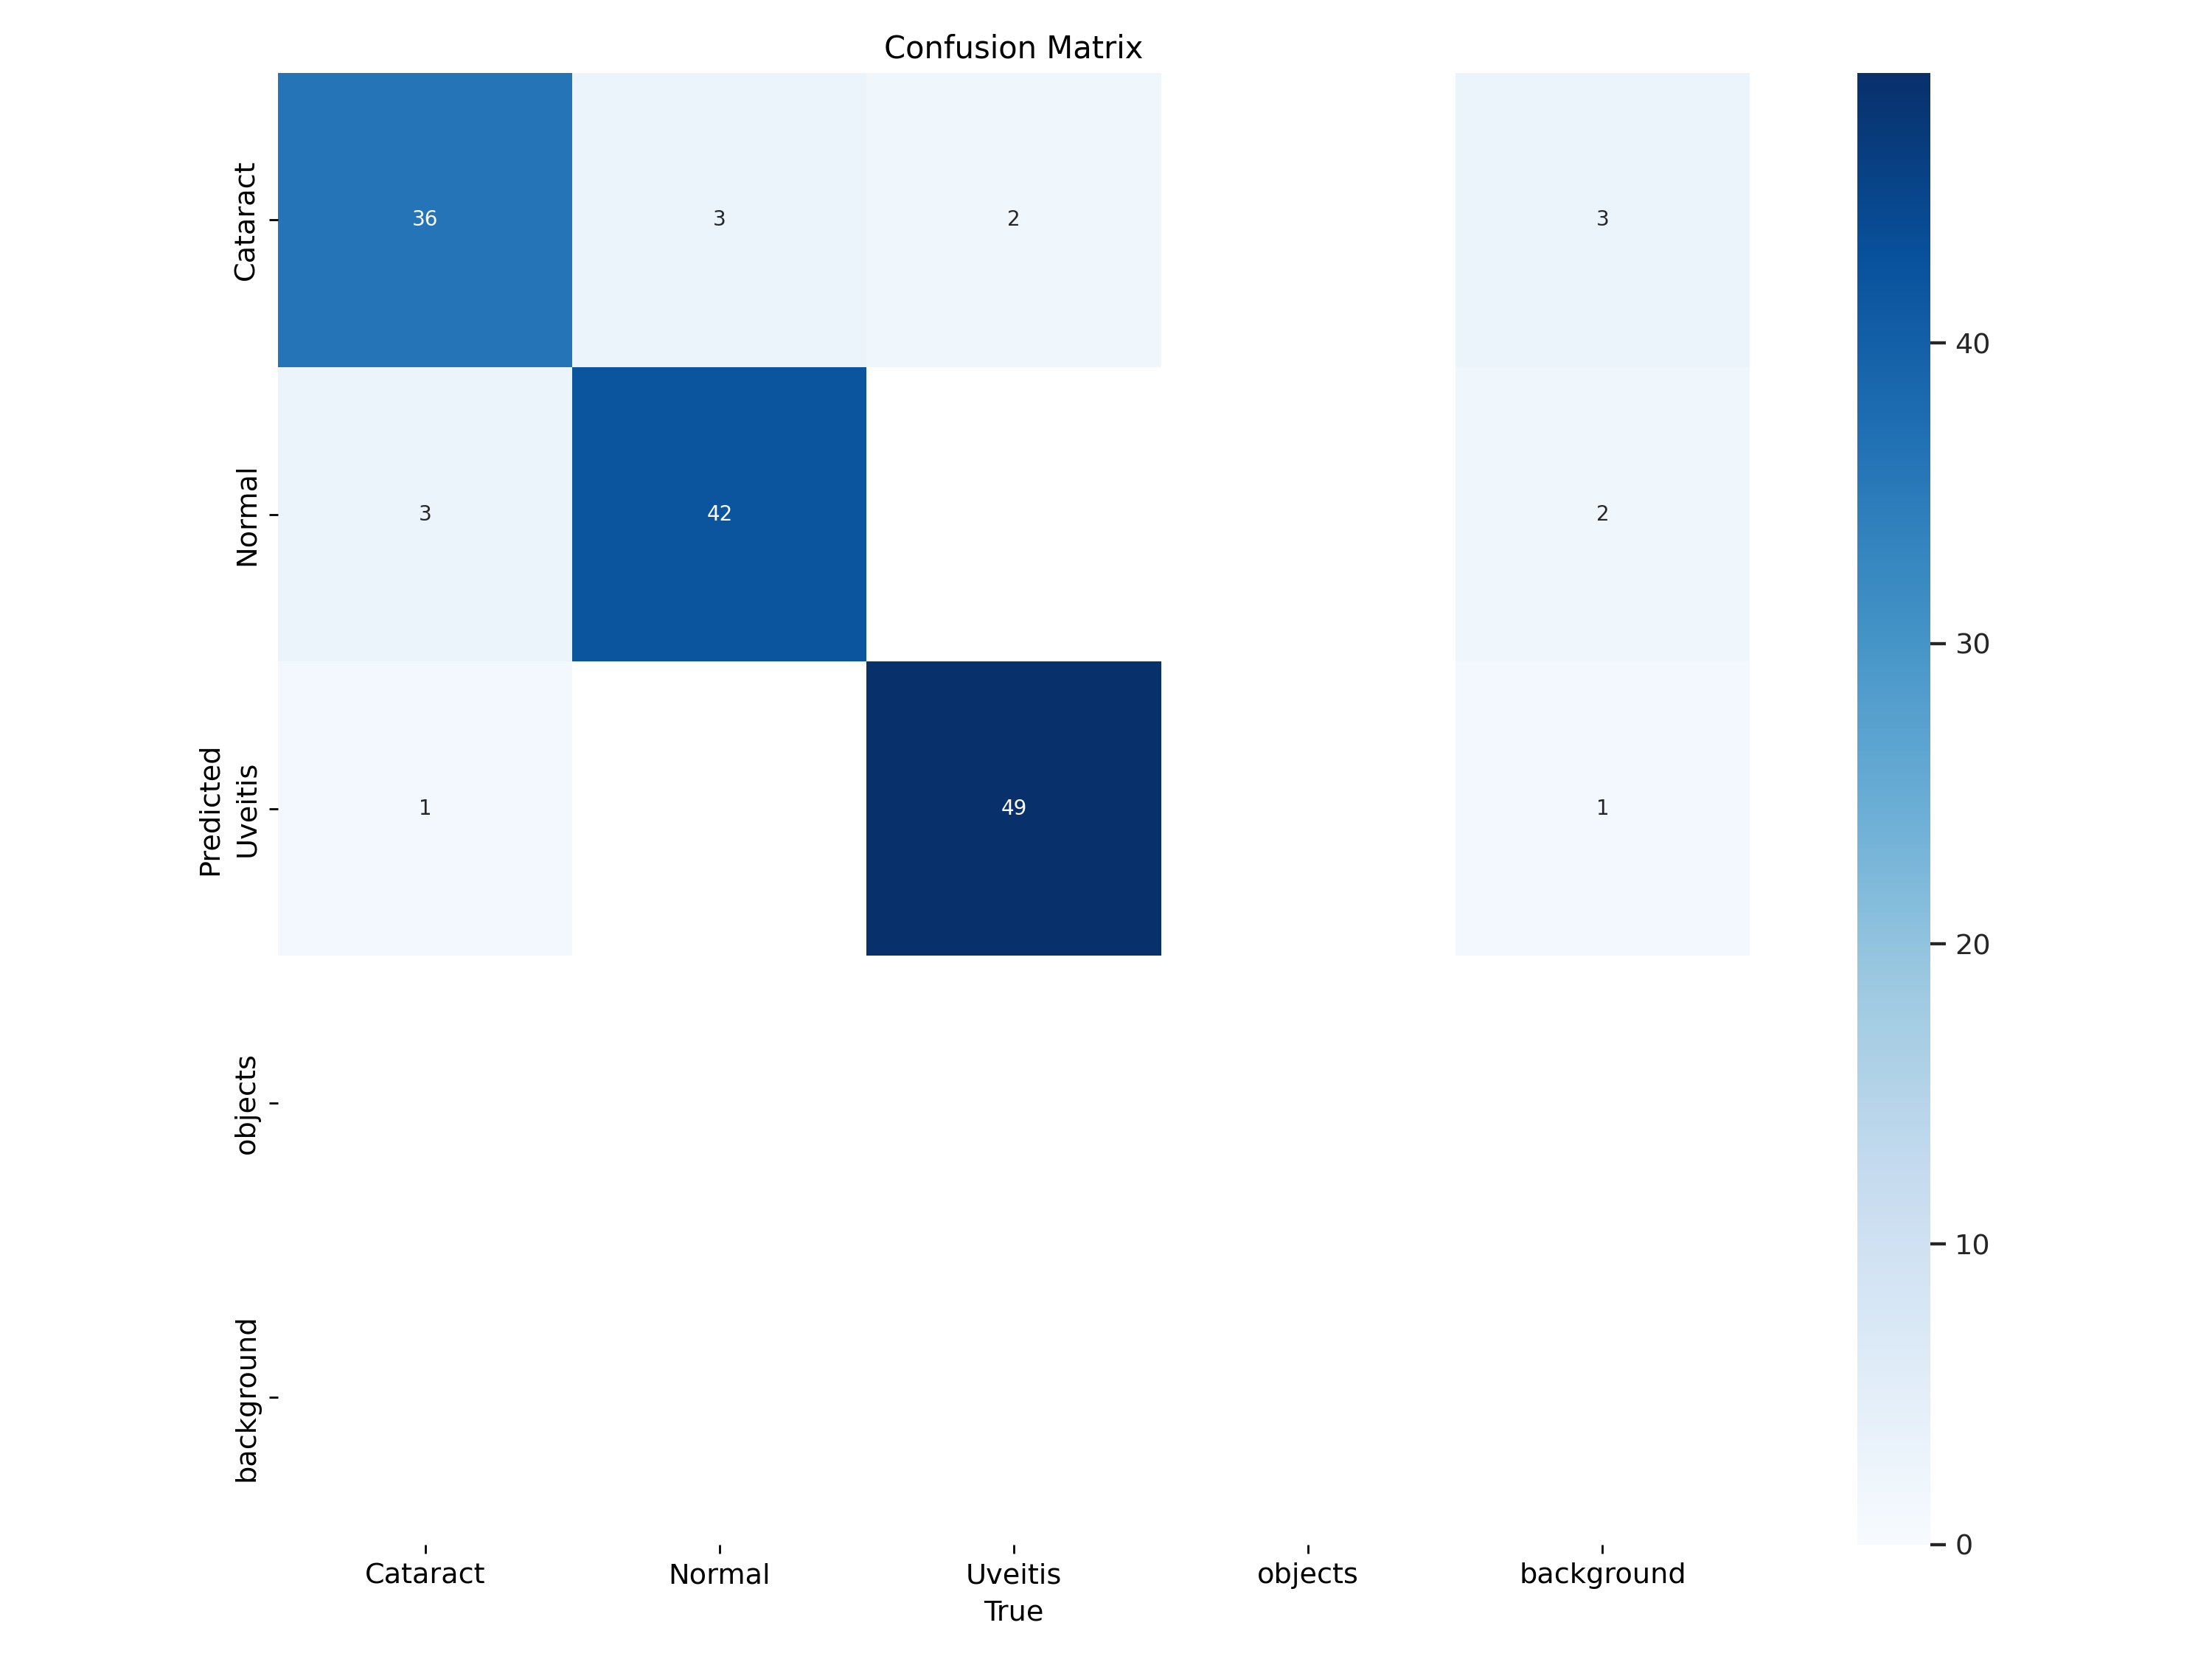

In [10]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)


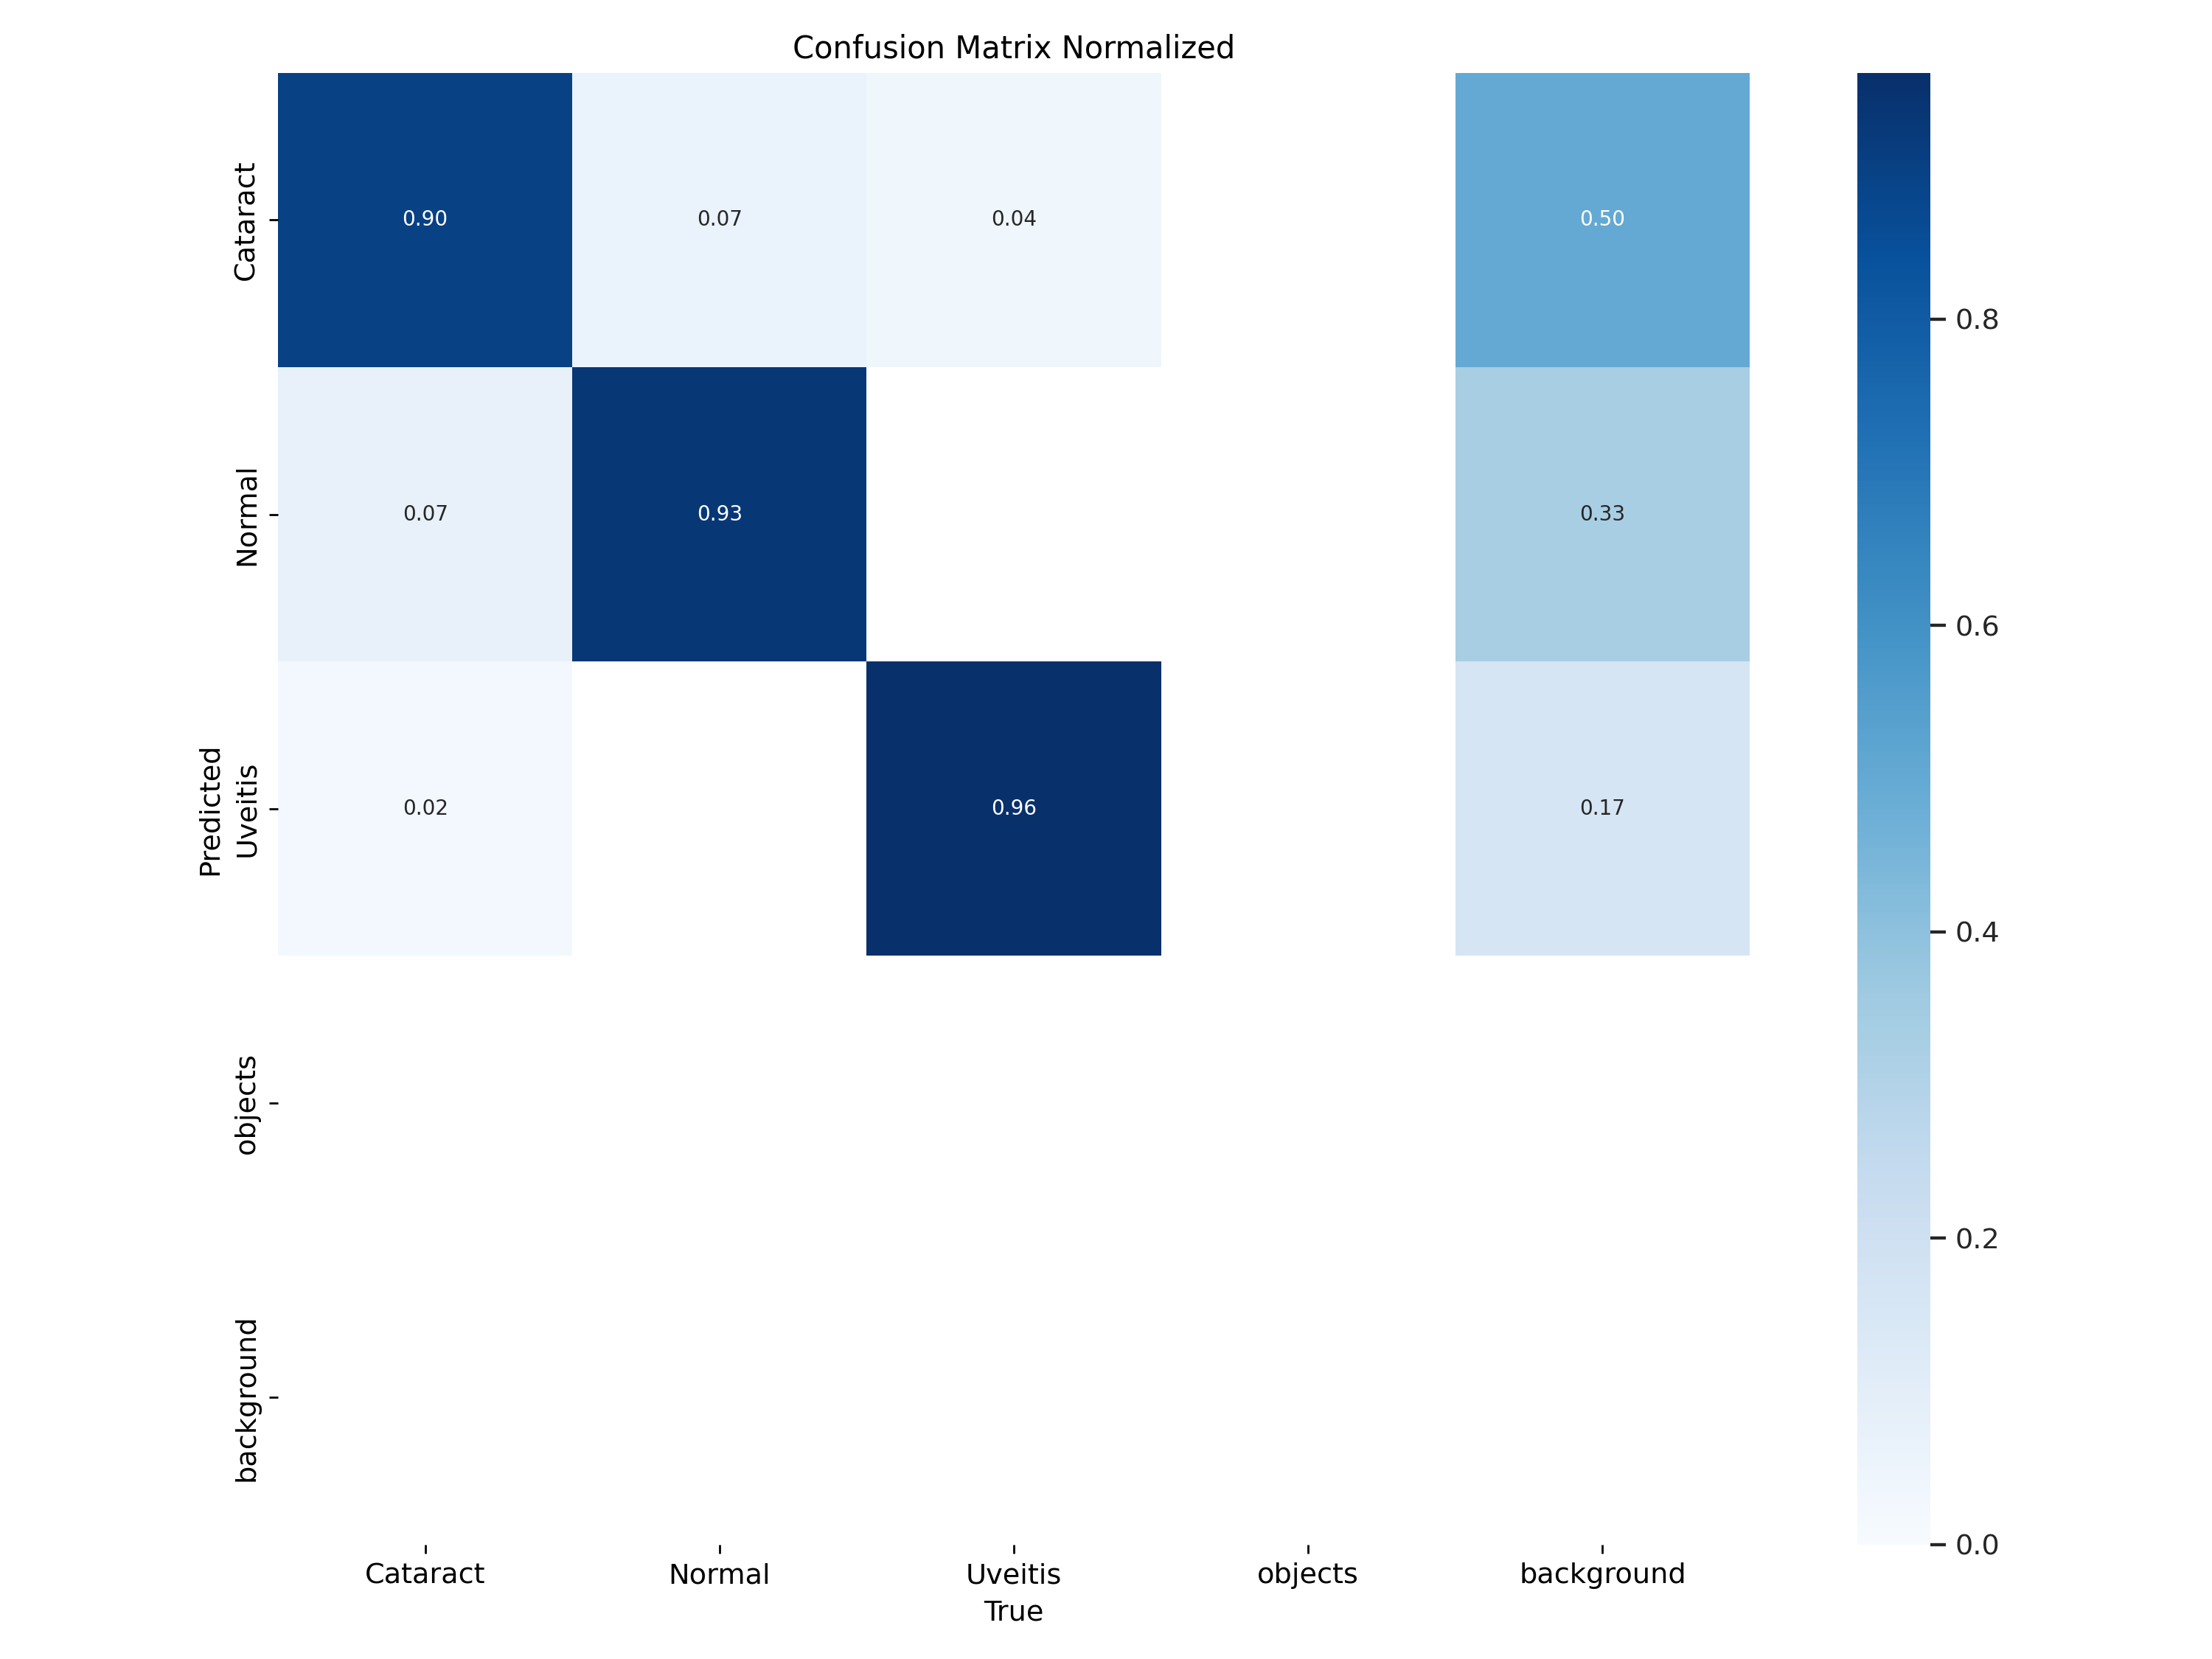

In [11]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

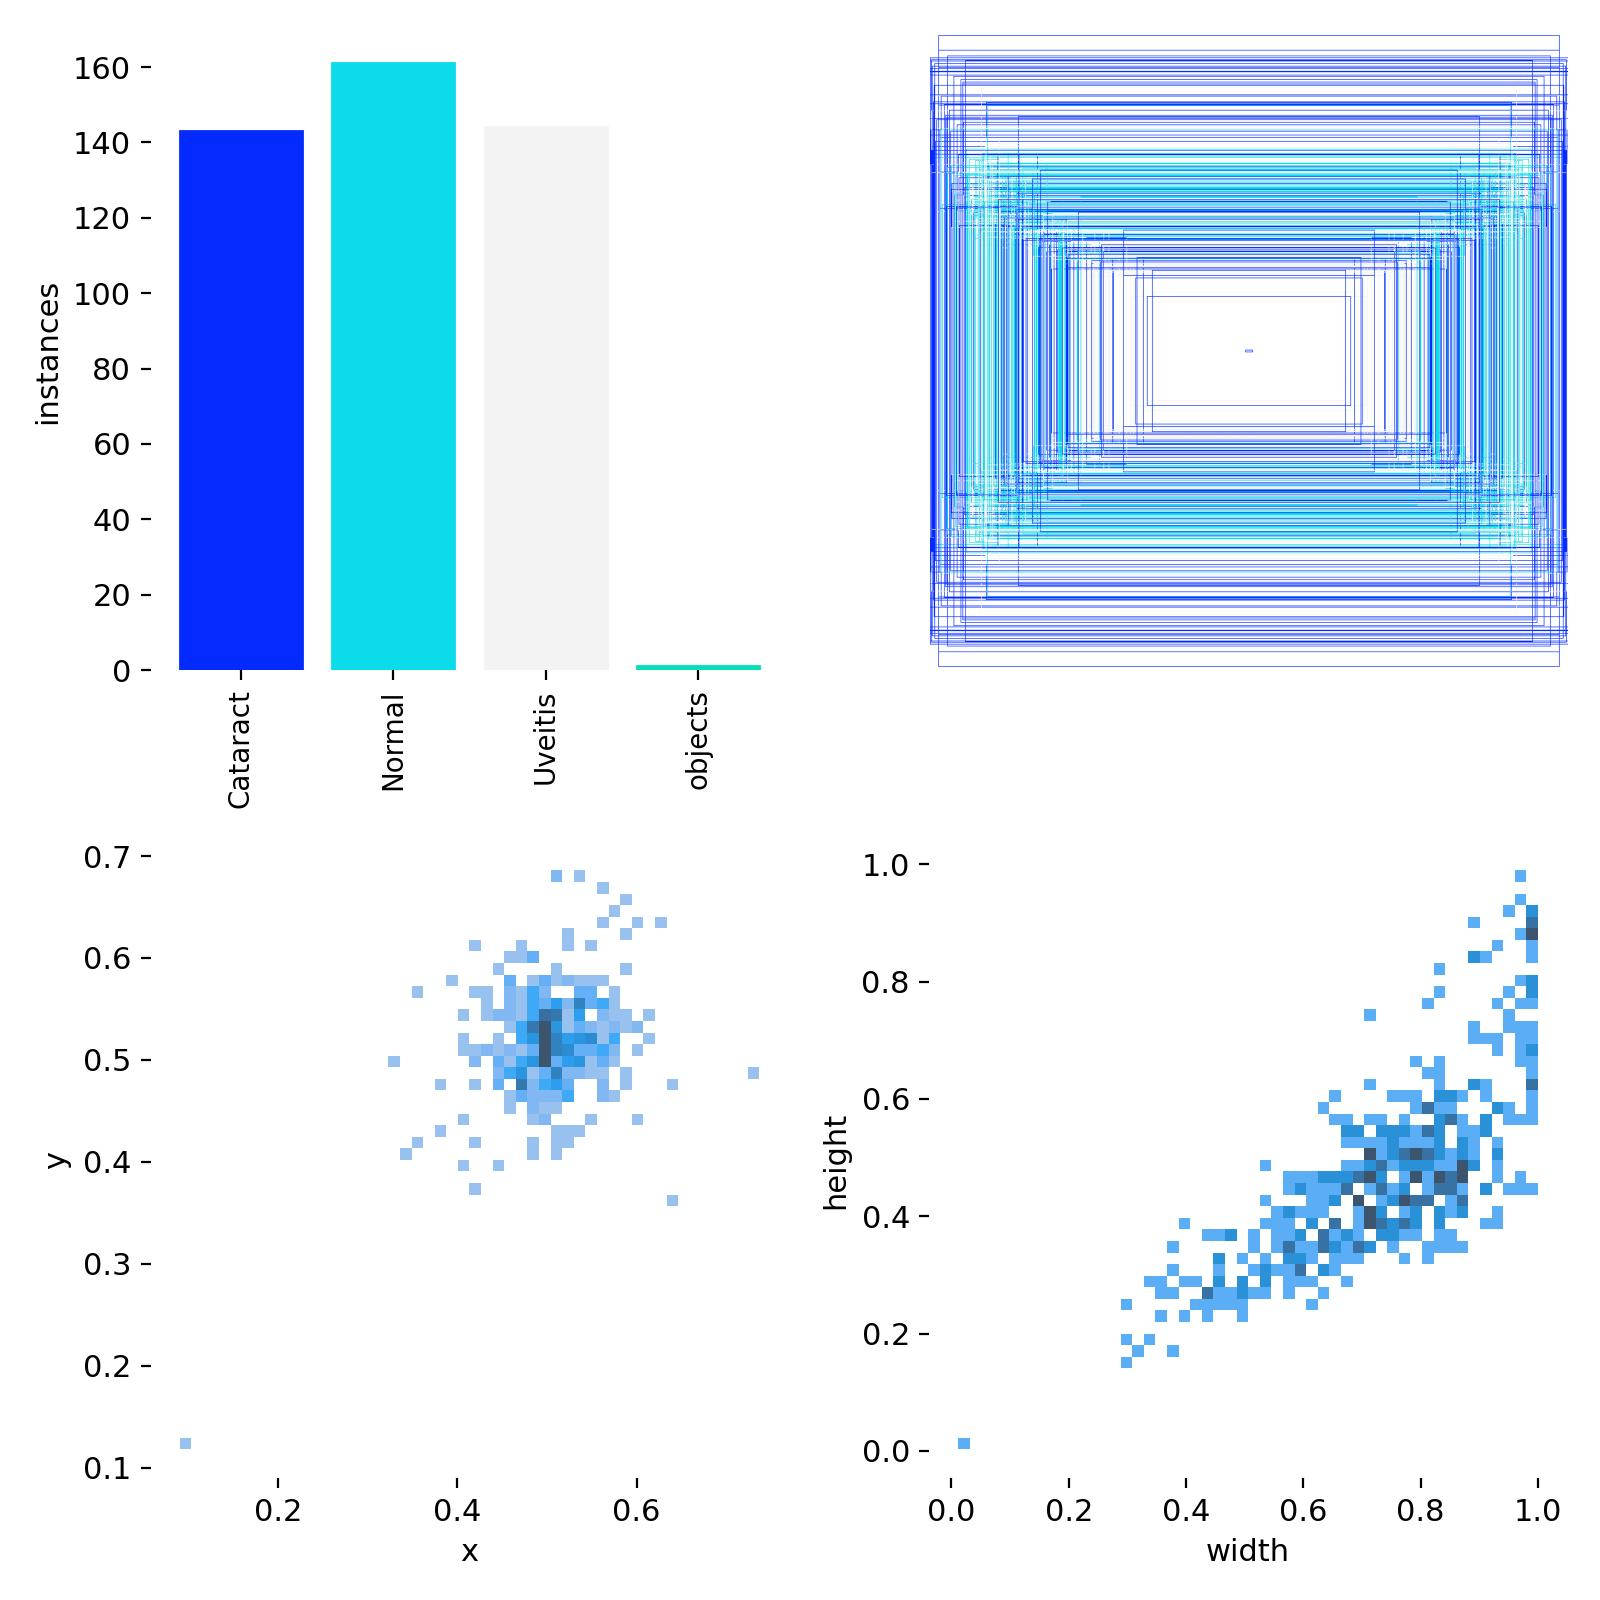

In [12]:
Image("/content/runs/detect/train/labels.jpg", width=600)

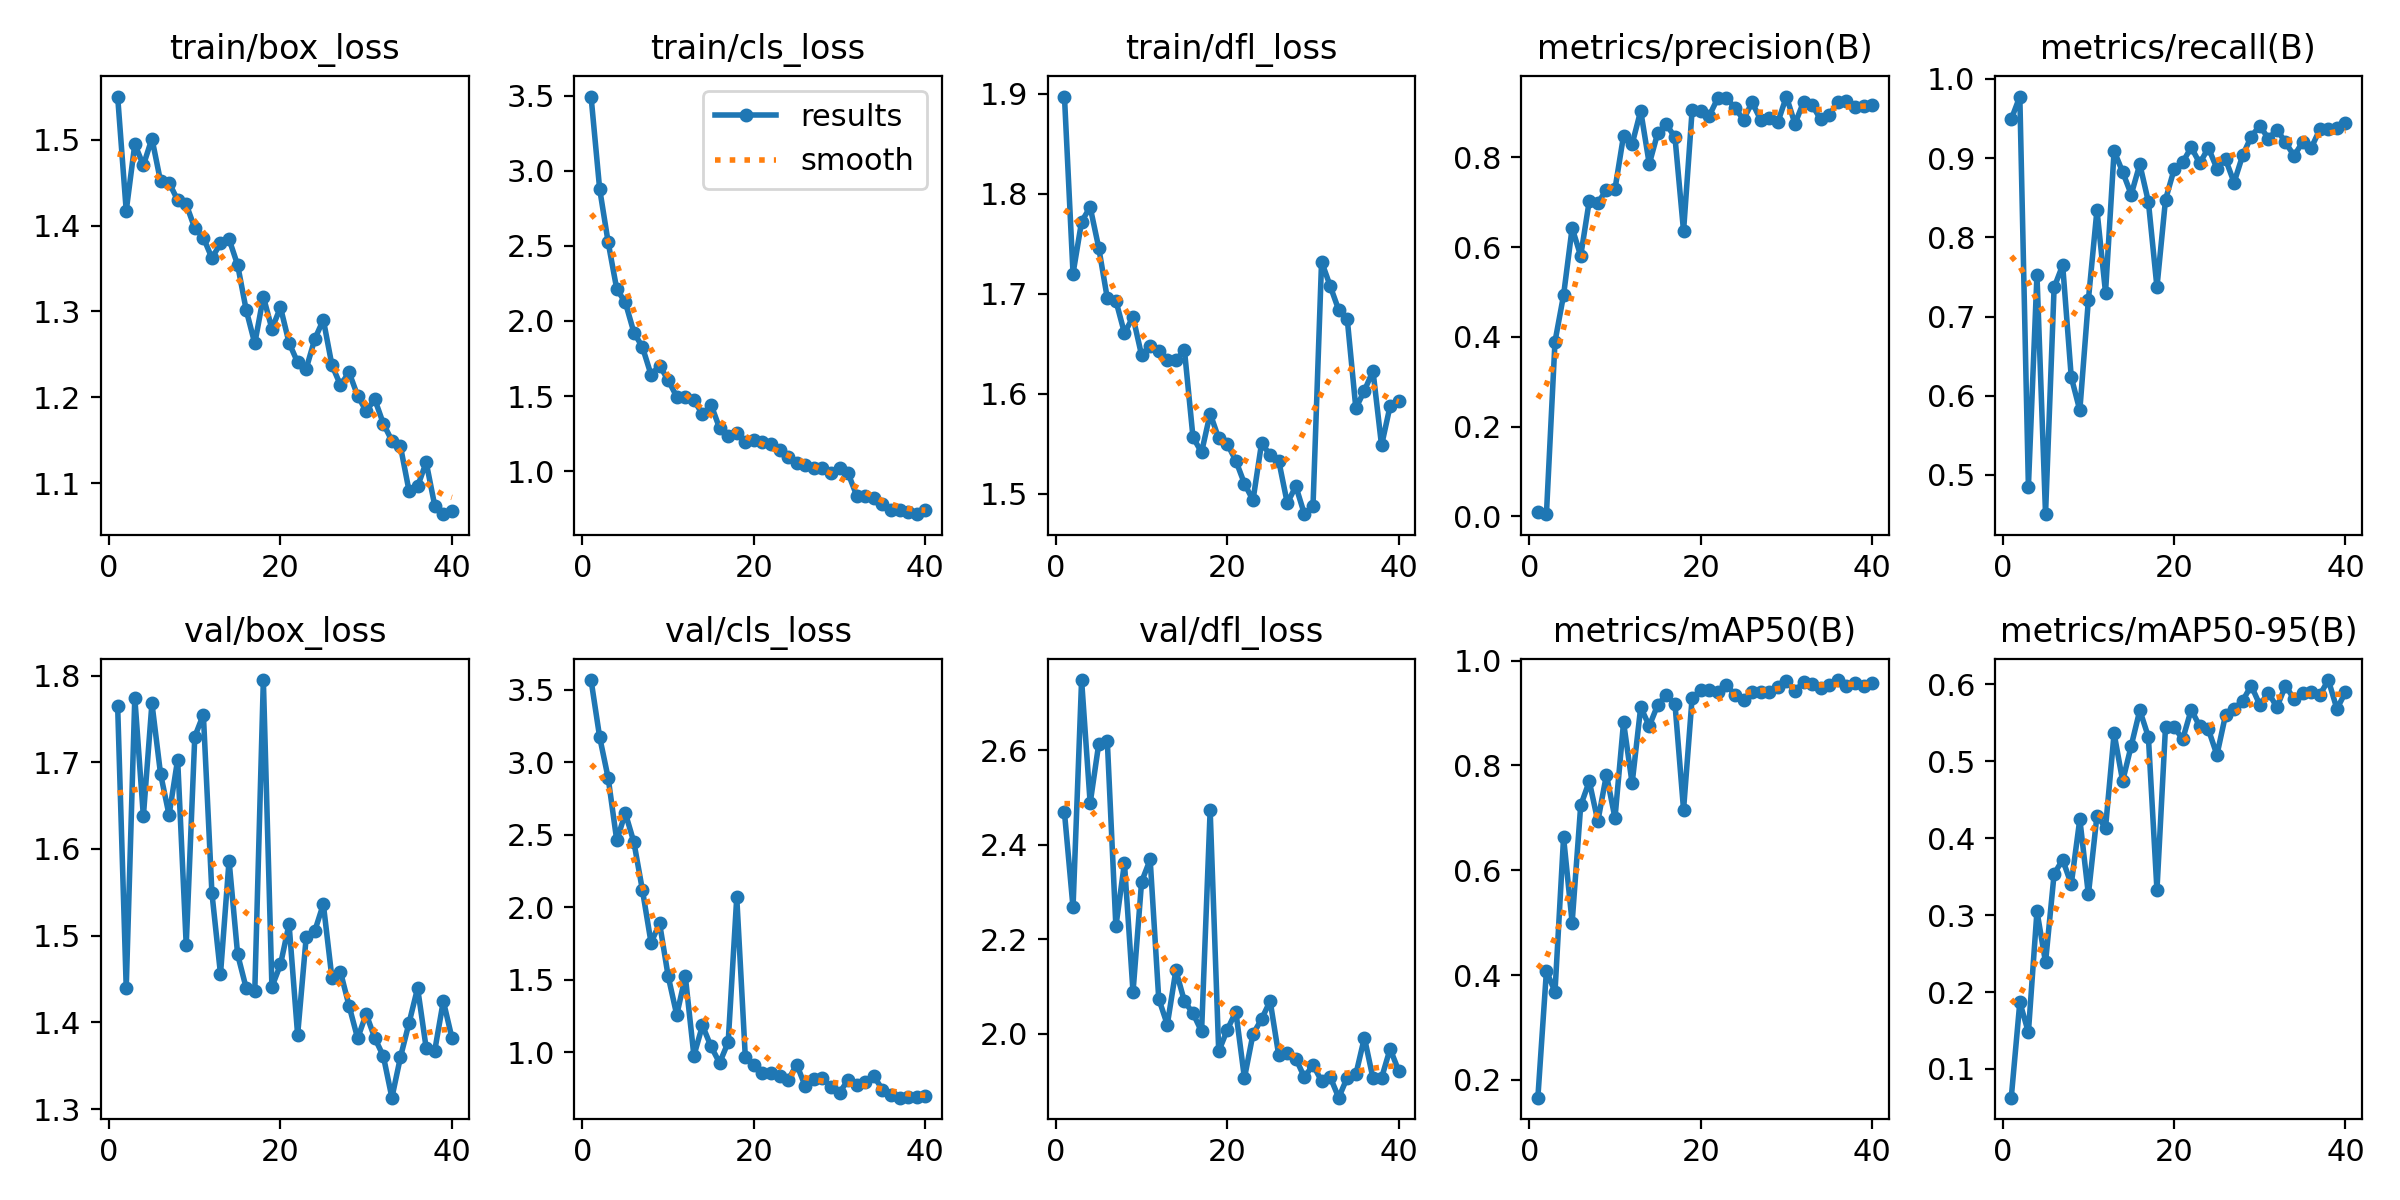

In [13]:
Image("/content/runs/detect/train/results.png", width=600)

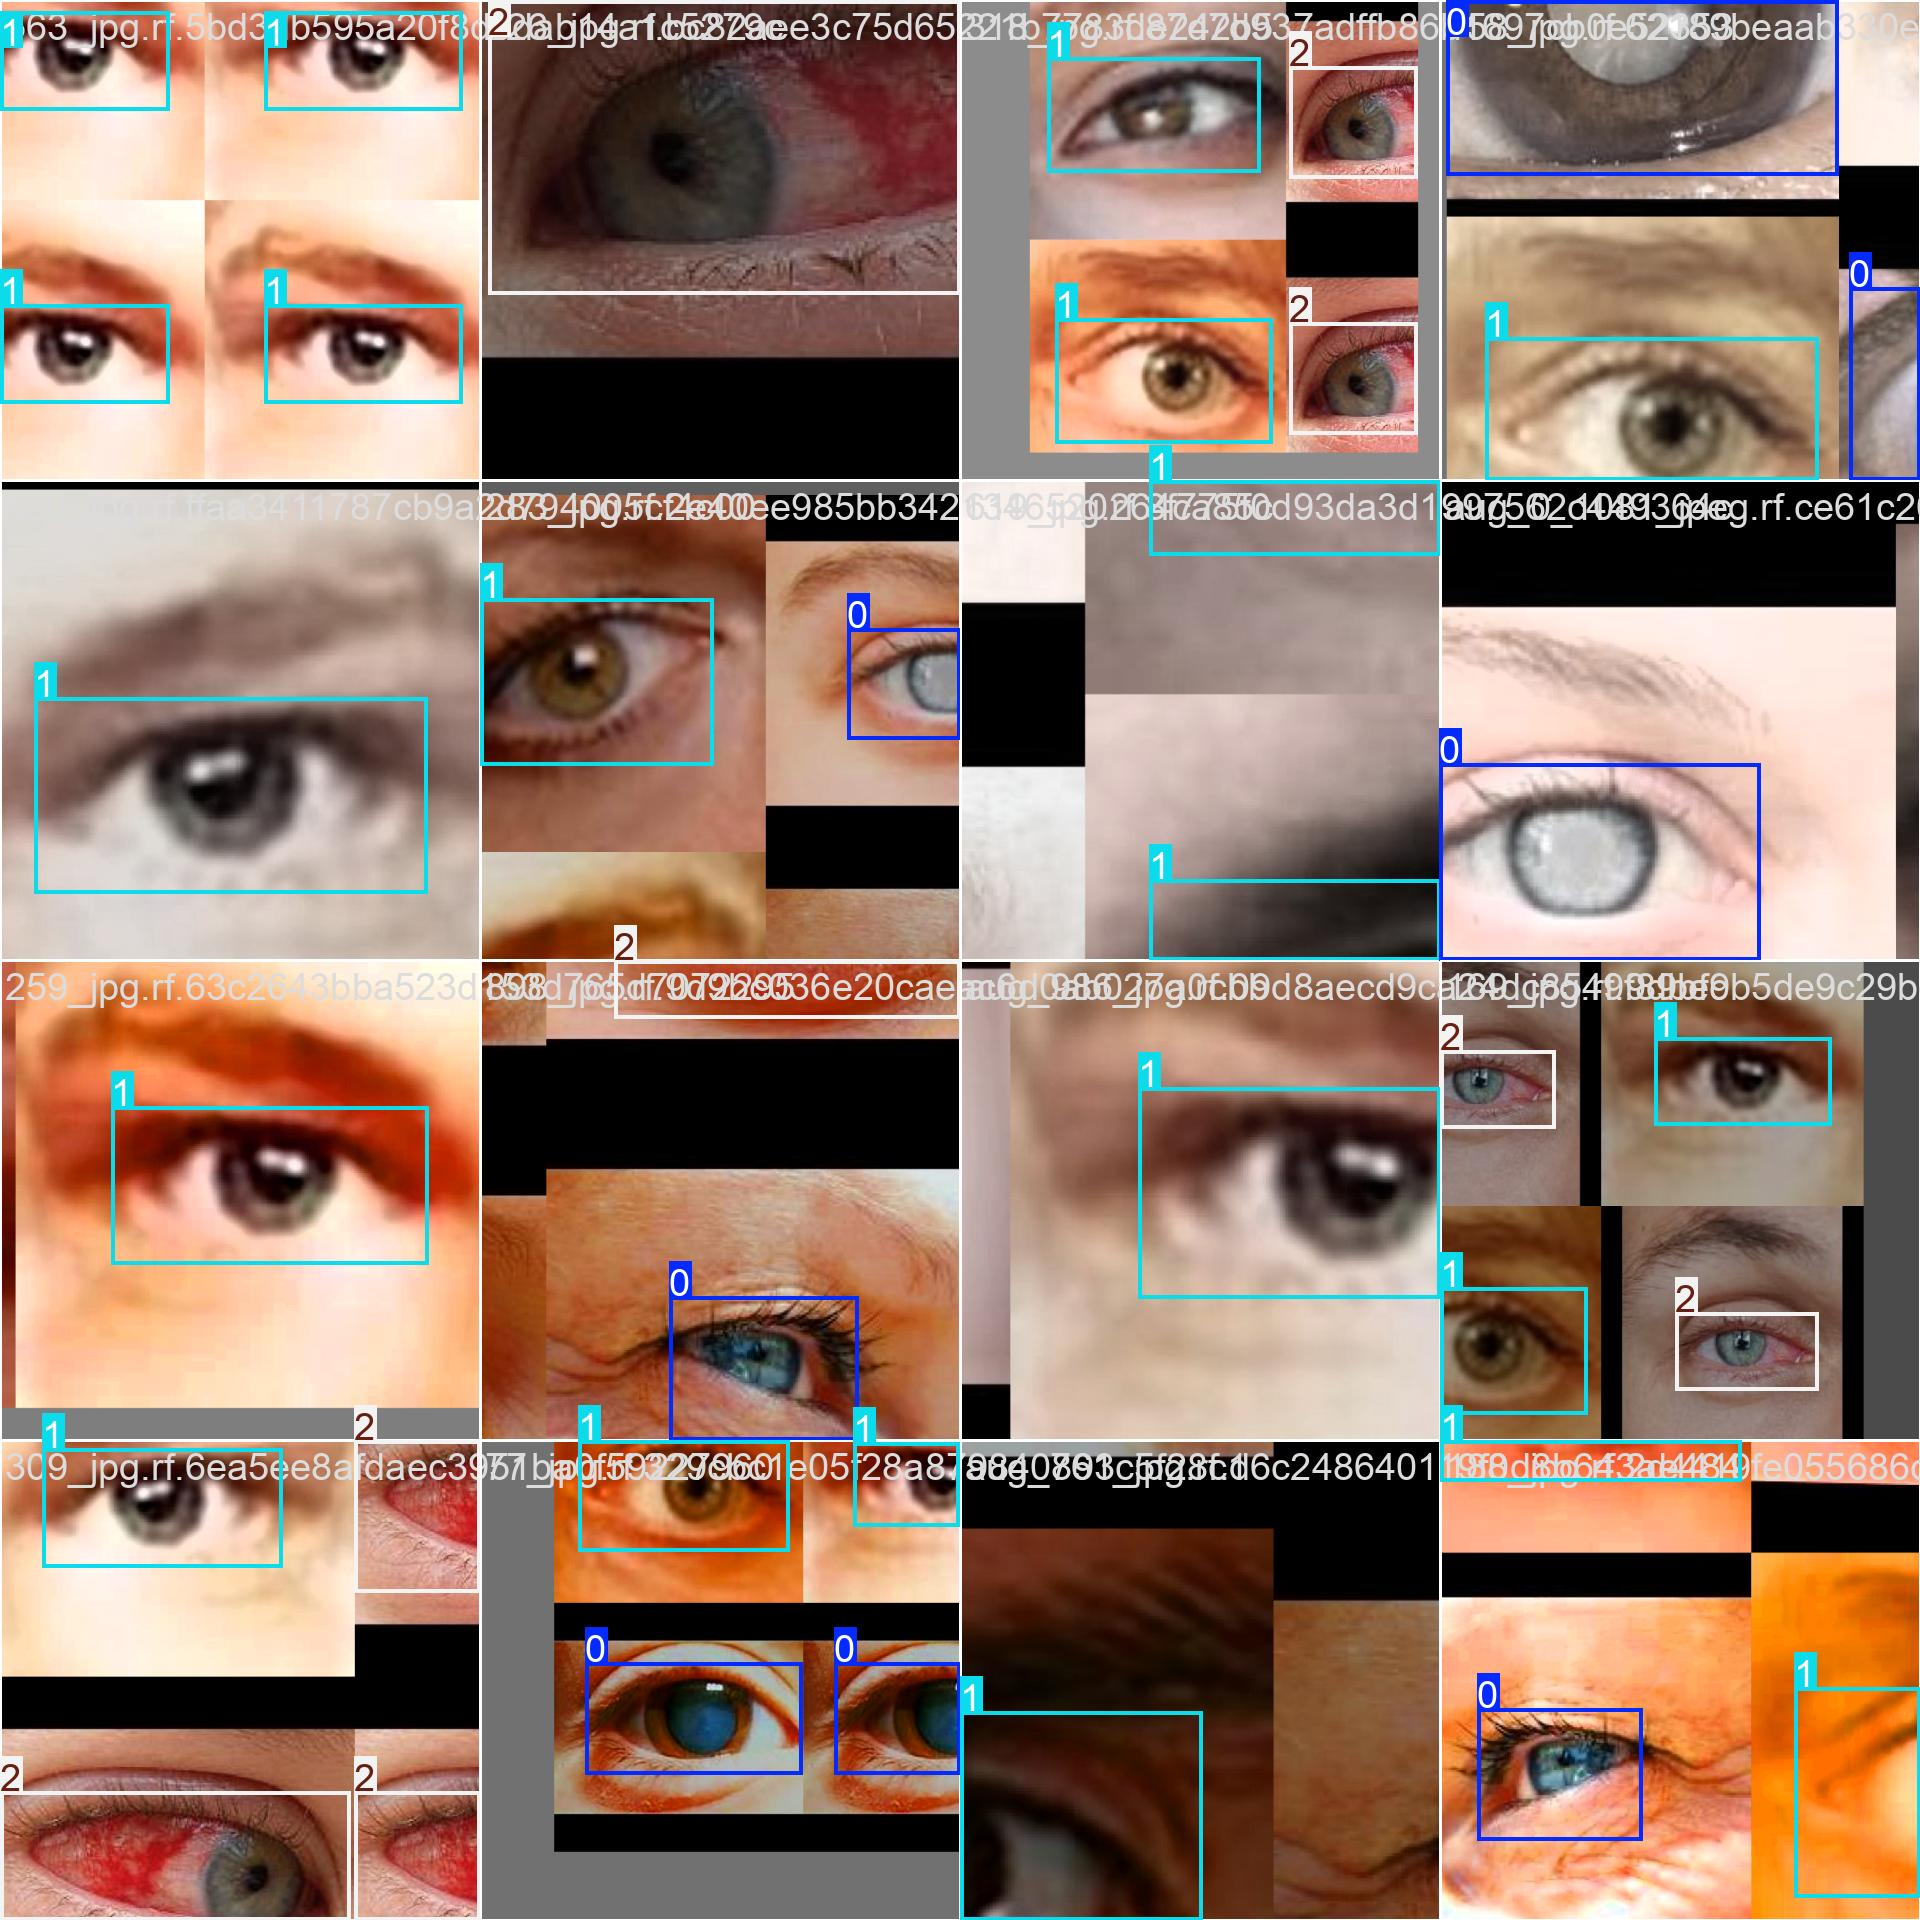

In [15]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

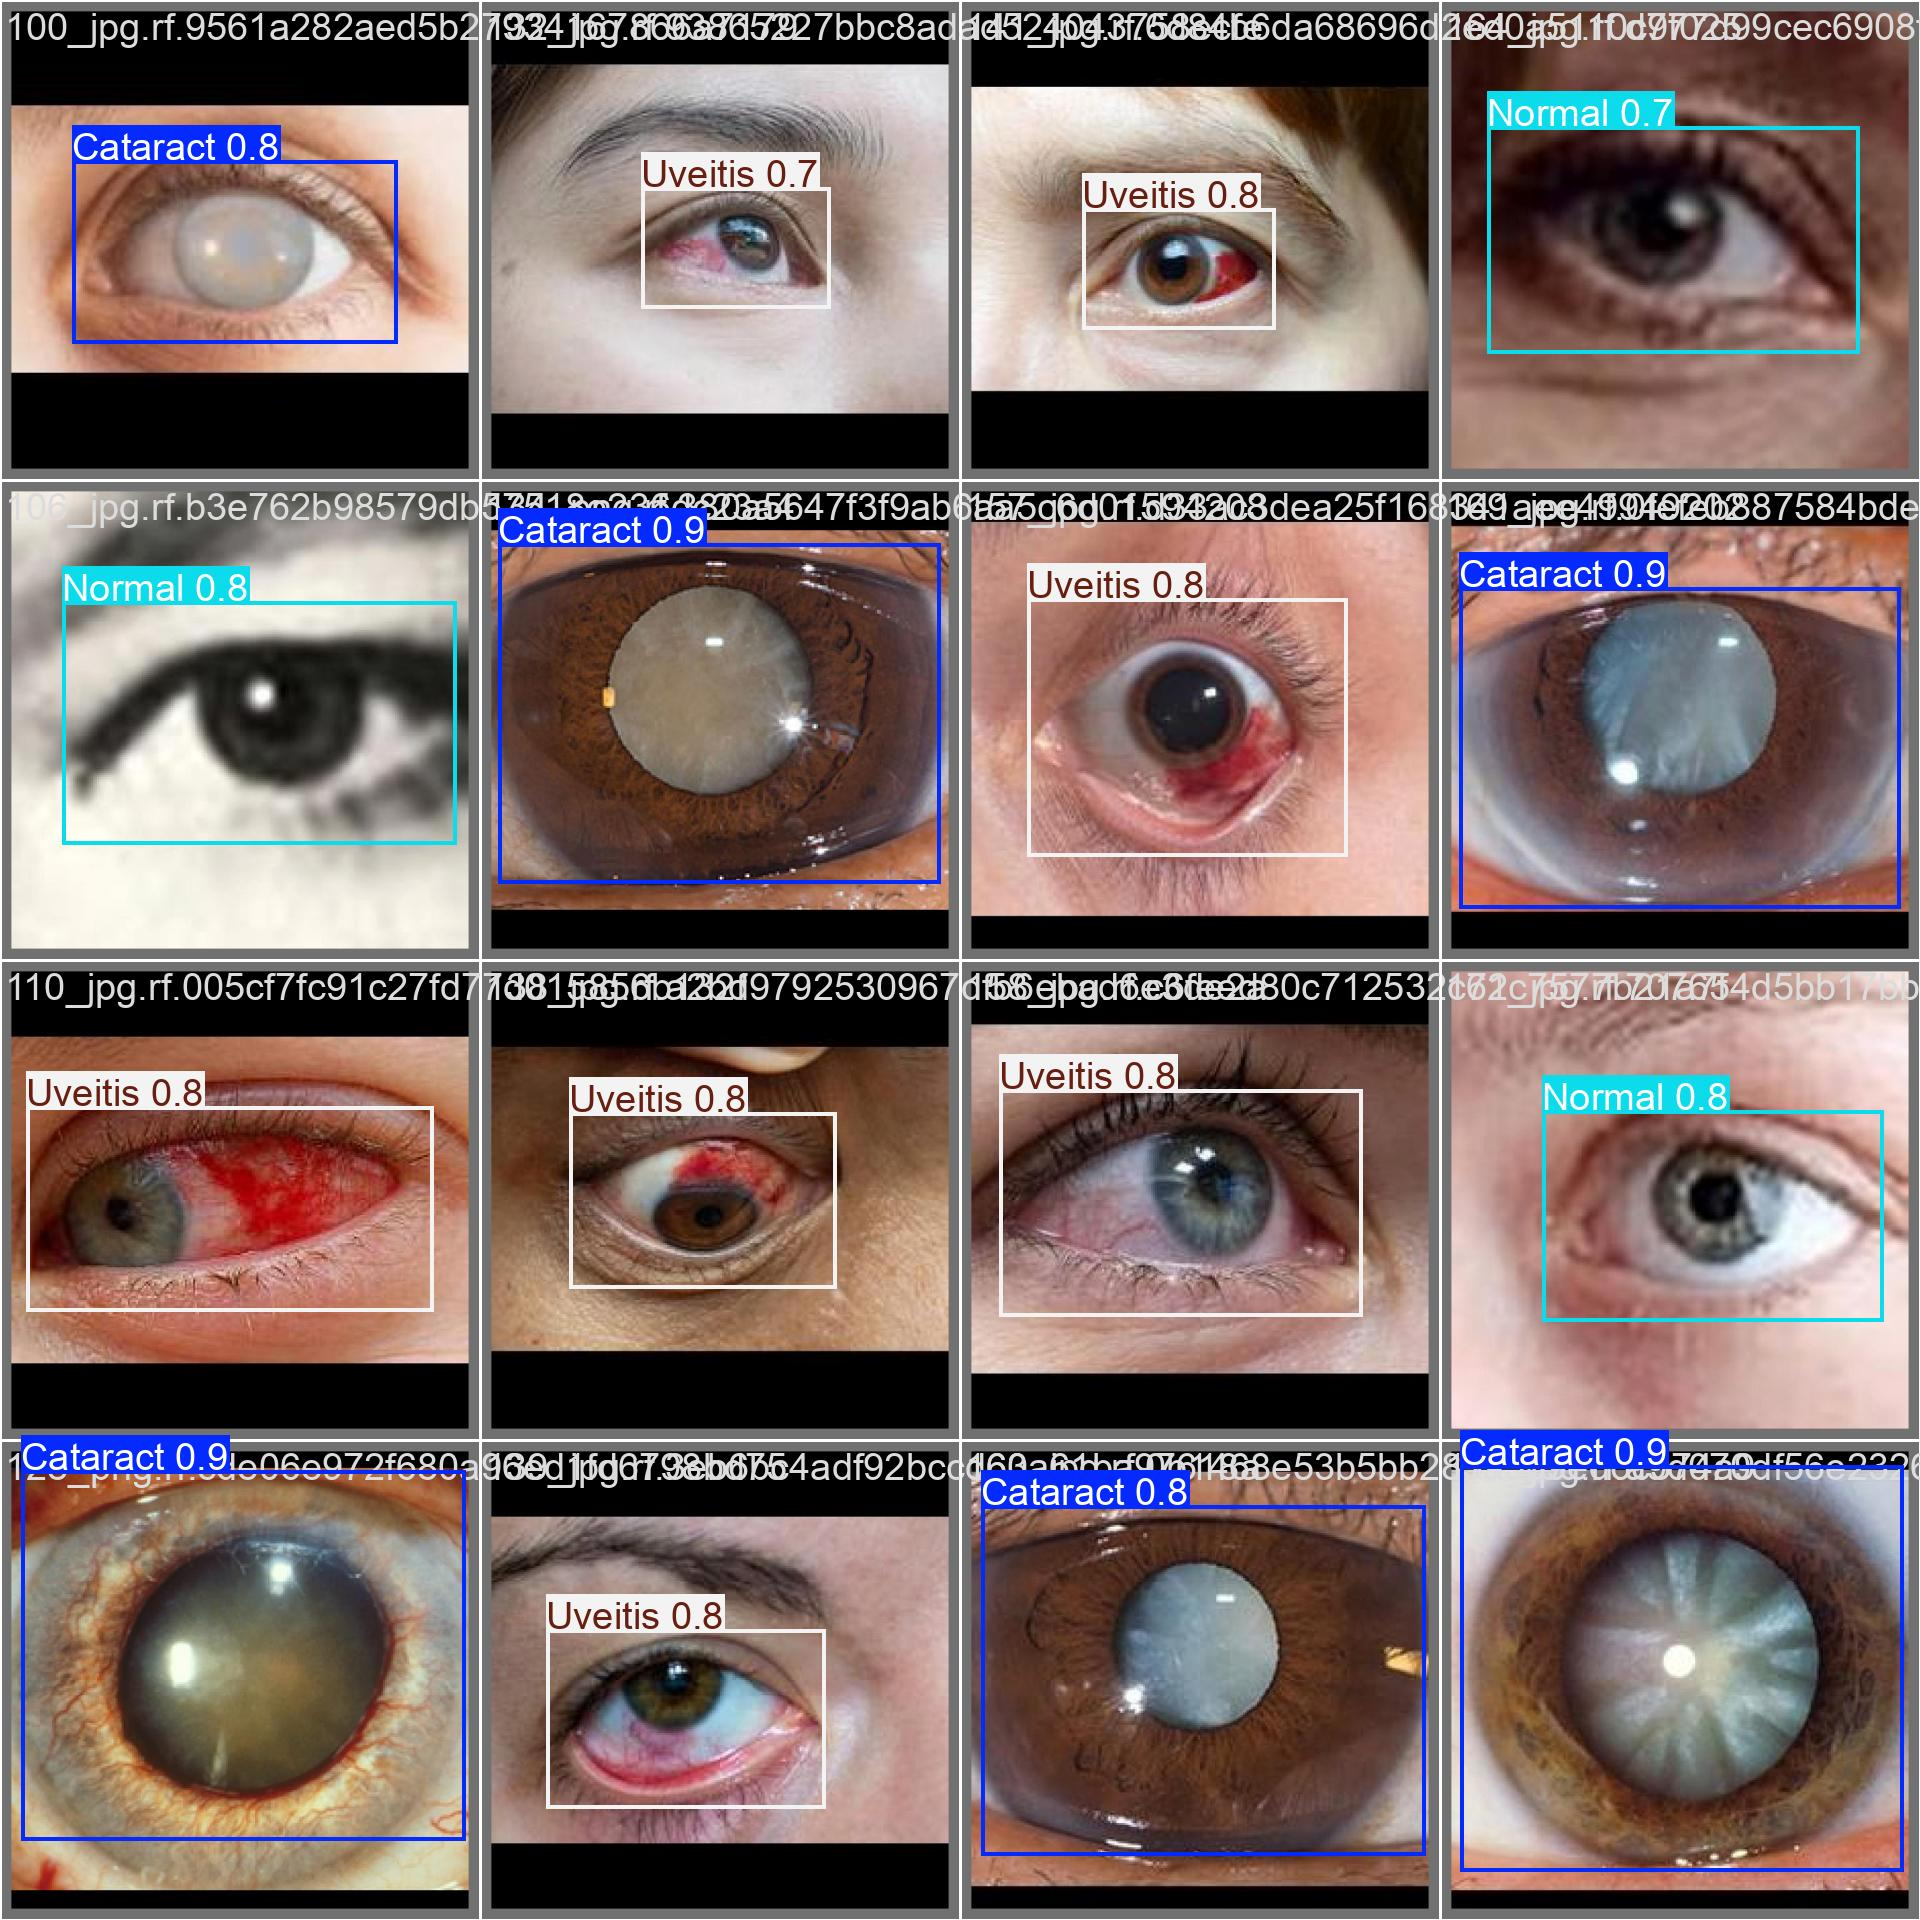

In [16]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)


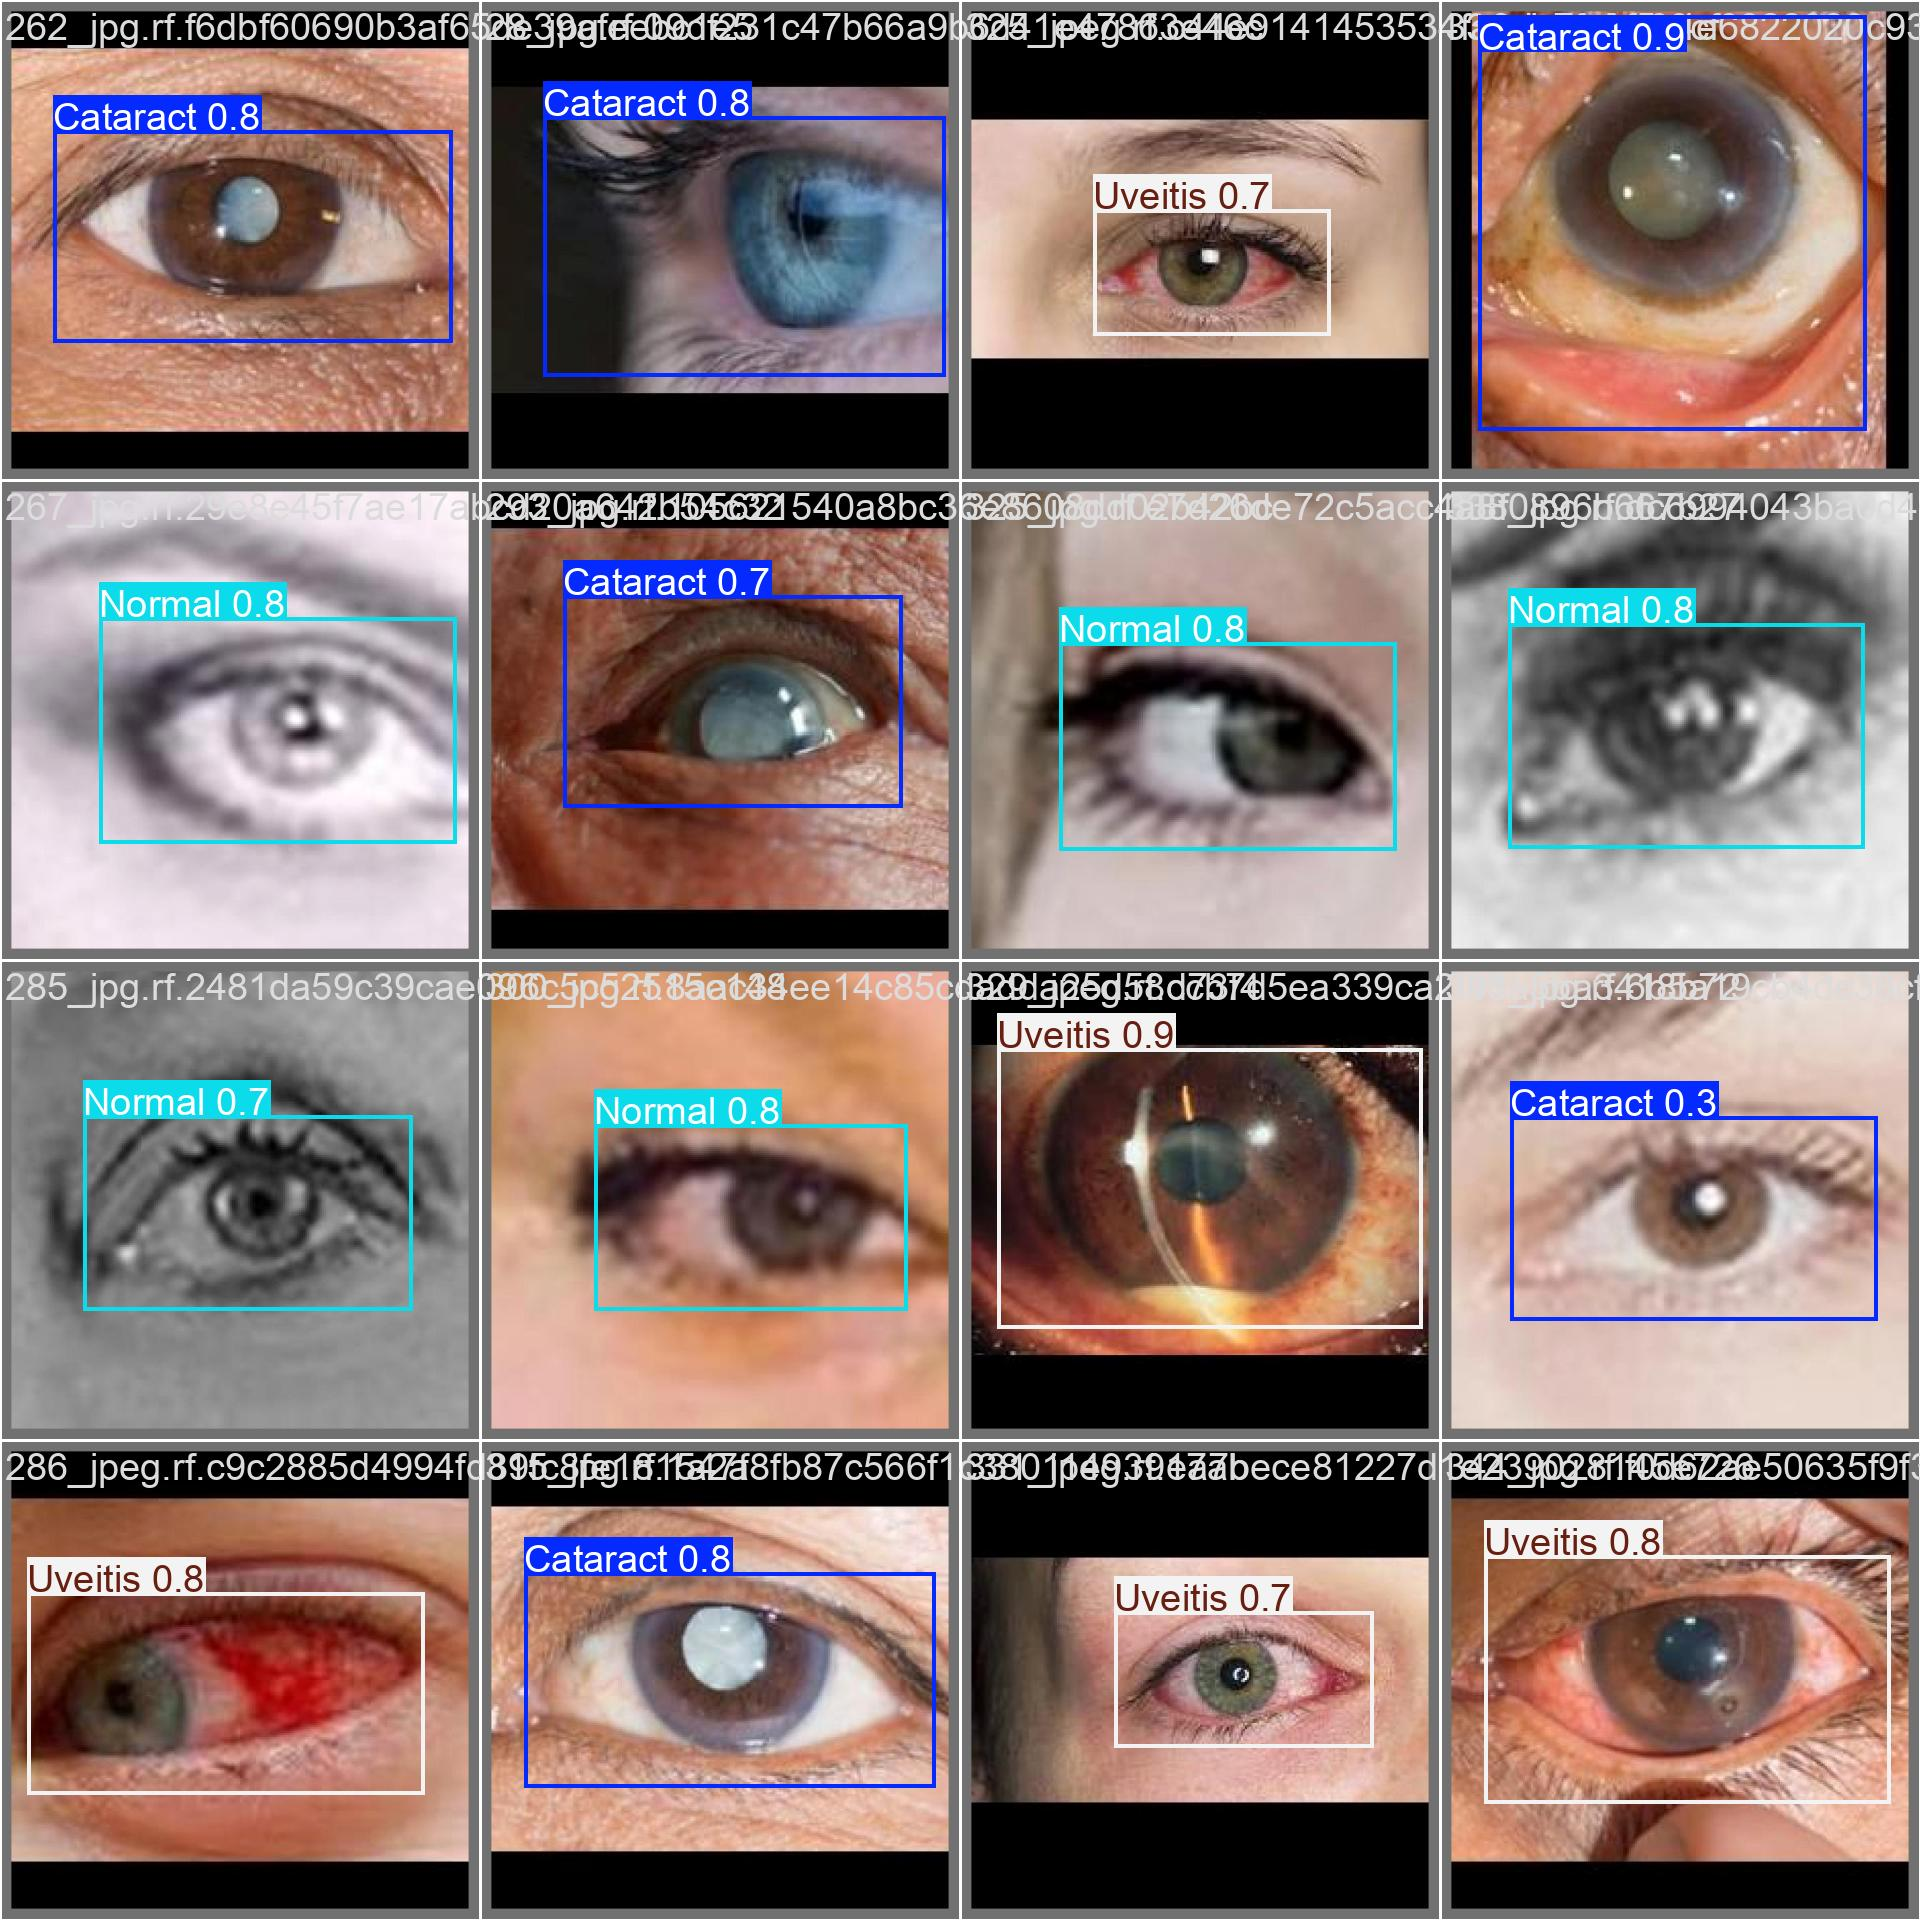

In [17]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

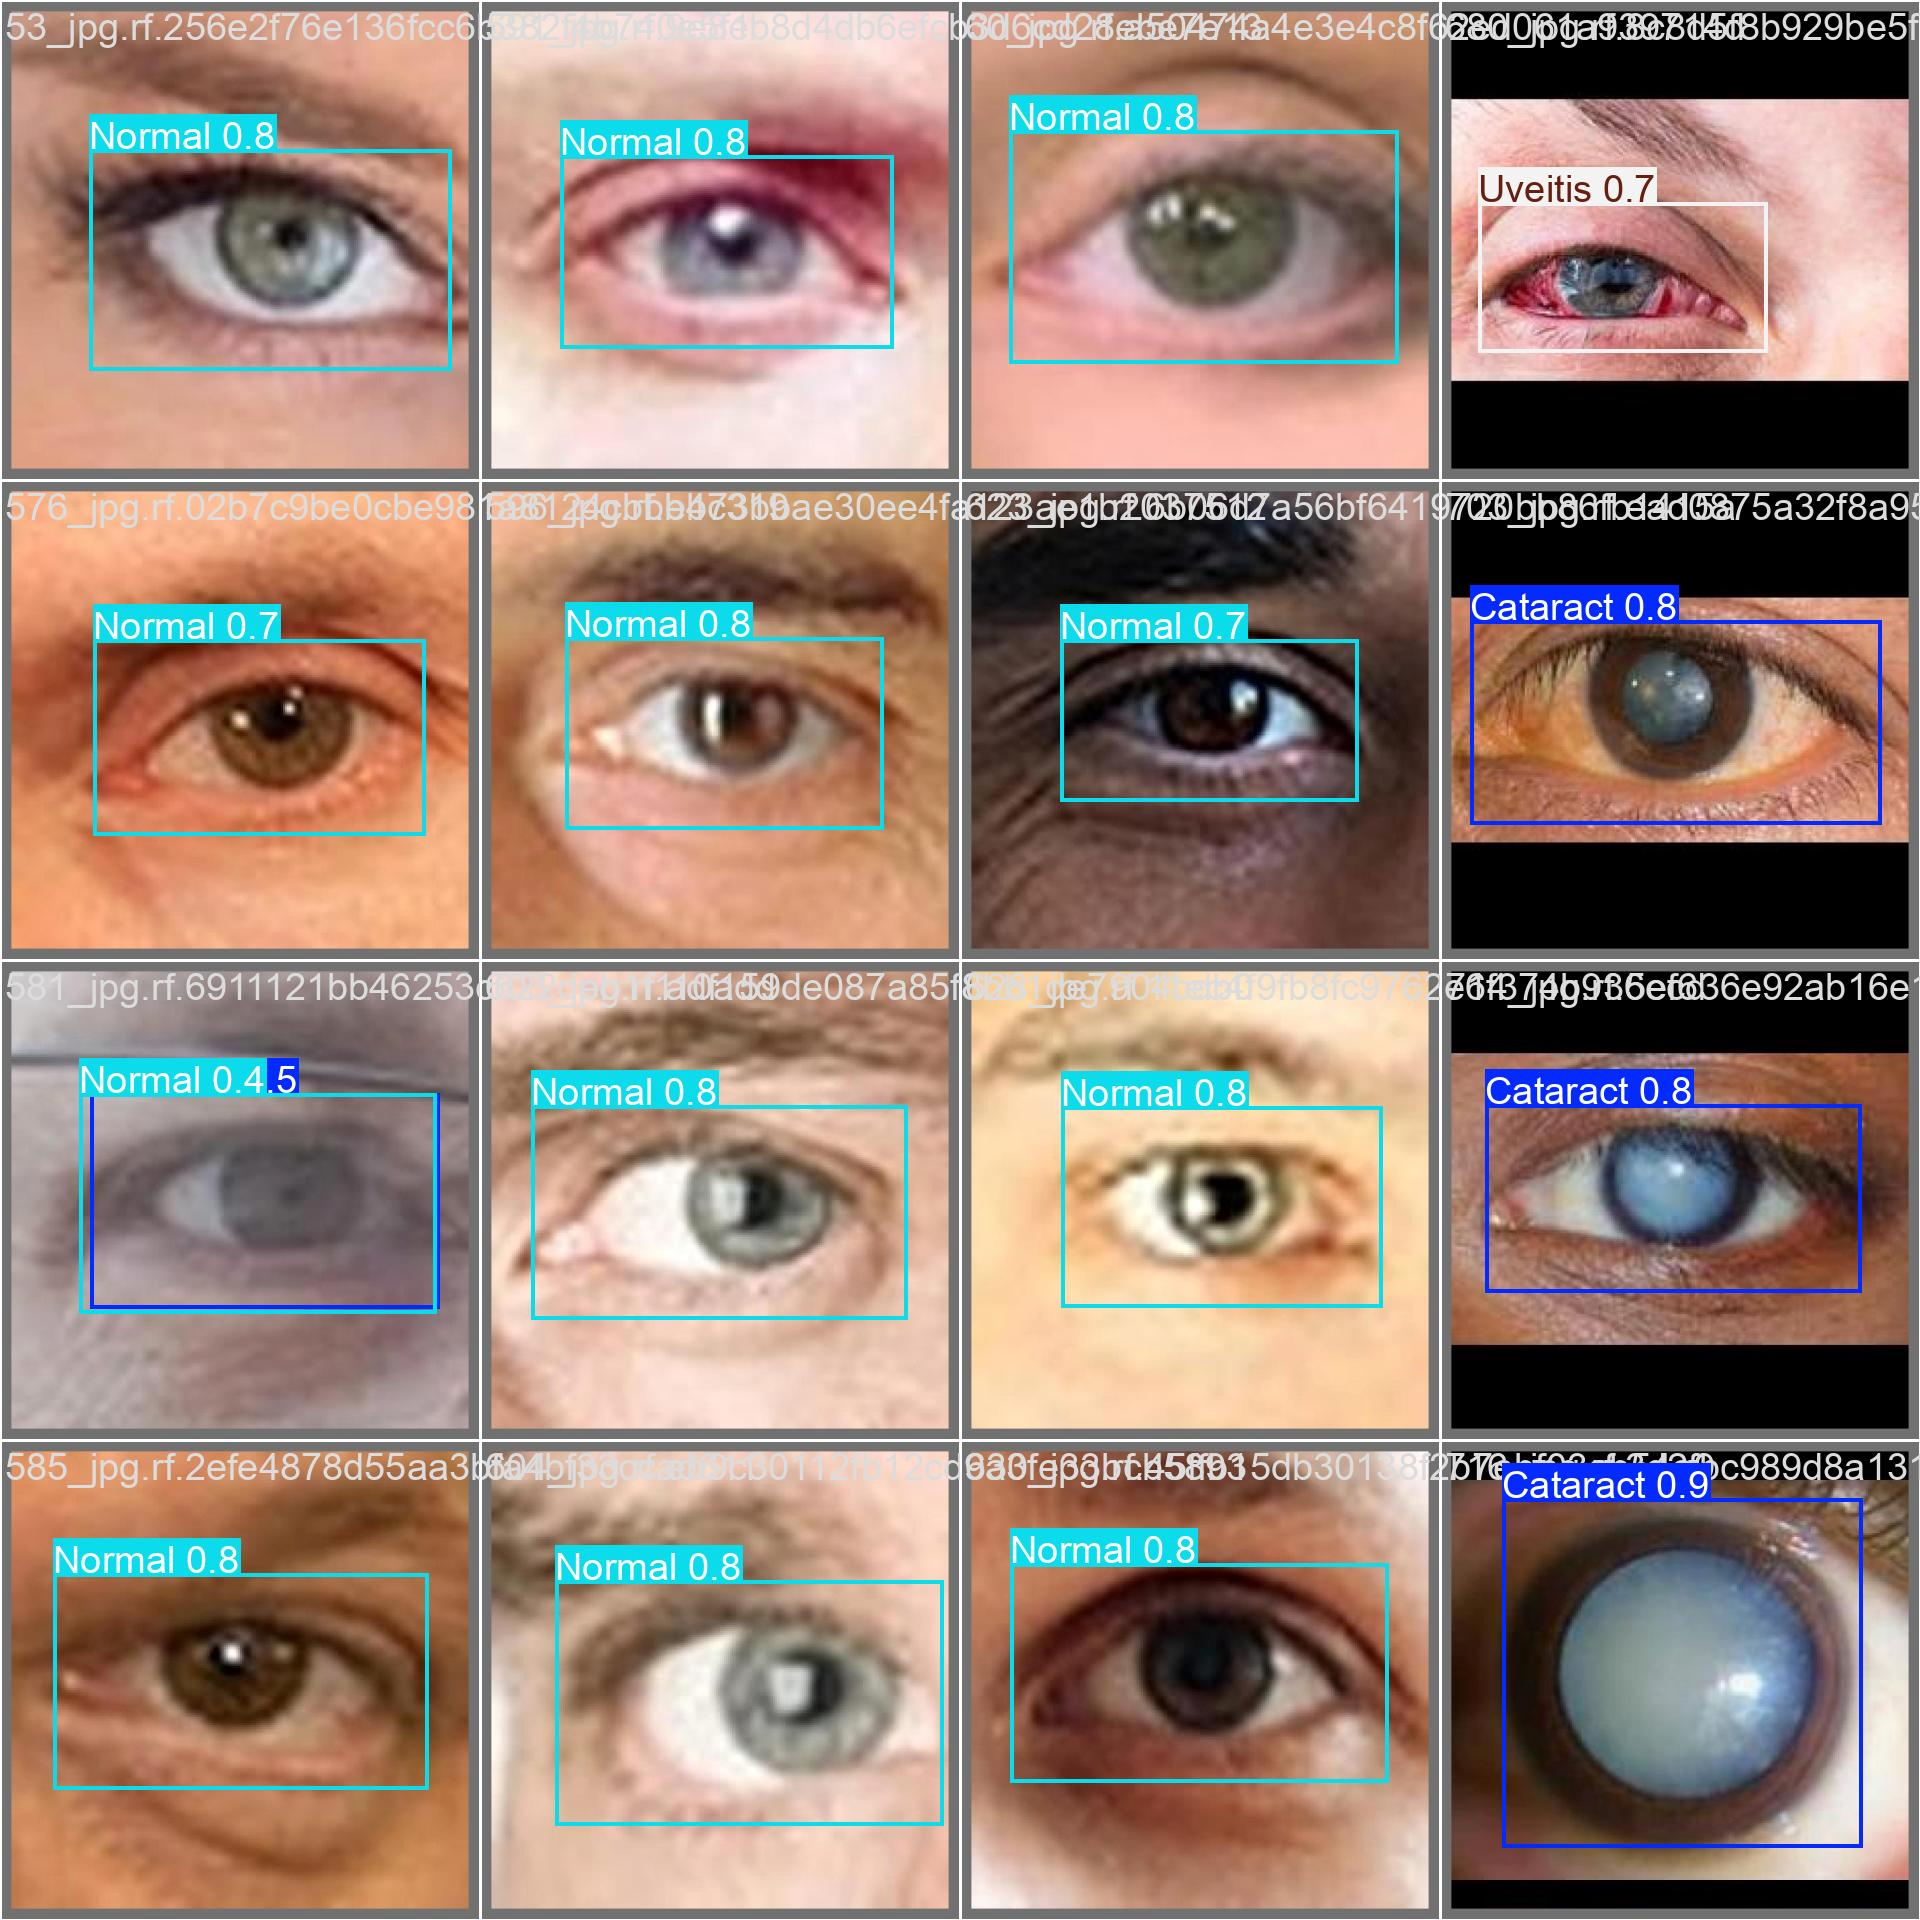

In [18]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

In [23]:
model_path = '/content/runs/detect/train/weights/best.pt'

In [24]:
!yolo task=detect mode=val model={model_path} data={dataset.location}/data.yaml

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/eye-disease-detection-1/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100% 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:02<00:00,  3.50it/s]
                   all        135        136      0.912      0.937      0.957      0.606
              Cataract         40         40      0.852        0.9      0.934      0.606
                Normal         45         45      0.934      0.949      0.969      0.585
               Uveitis         50         51      0.949      0.961      0.969      0.628
Speed: 2.1ms preprocess, 6.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [27]:
!yolo task=detect mode=predict model= {model_path} conf=0.25 source={dataset.location}/valid/images save=True


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/135 /content/eye-disease-detection-1/valid/images/100_jpg.rf.9561a282aed5b27934167866a71792bd.jpg: 640x640 1 Cataract, 14.1ms
image 2/135 /content/eye-disease-detection-1/valid/images/106_jpg.rf.b3e762b98579db57518e236dc23a4063.jpg: 640x640 1 Normal, 15.2ms
image 3/135 /content/eye-disease-detection-1/valid/images/110_jpg.rf.005cf7fc91c27fd77d015856b132f334.jpg: 640x640 1 Uveitis, 15.9ms
image 4/135 /content/eye-disease-detection-1/valid/images/128_png.rf.cde06e972f680a96ed1fd6798bd75037.jpg: 640x640 1 Cataract, 16.6ms
image 5/135 /content/eye-disease-detection-1/valid/images/132_jpg.rf.93865227bbc8adad524043758ecfe04c.jpg: 640x640 1 Uveitis, 16.1ms
image 6/135 /content/eye-disease-detection-1/valid/images/134_png.rf.380a5647f3f9ab6aa5c6d01594208158.jpg: 640x640 1 Cataract, 14.2ms
image 7/135 /content/eye-disease-

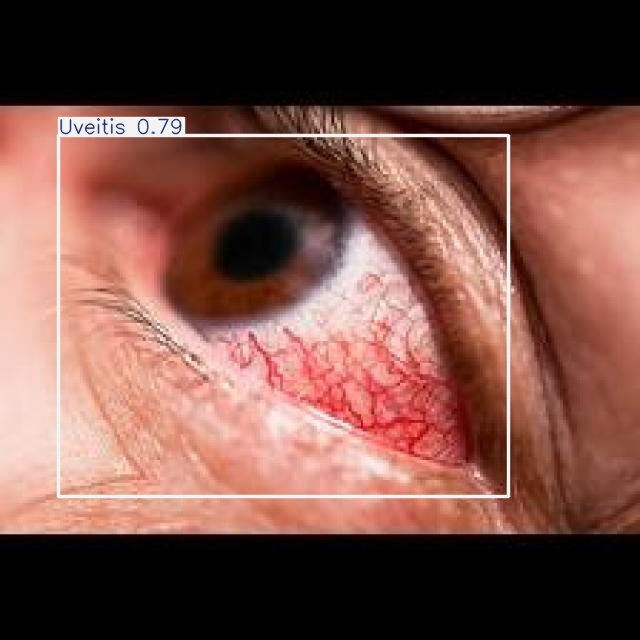

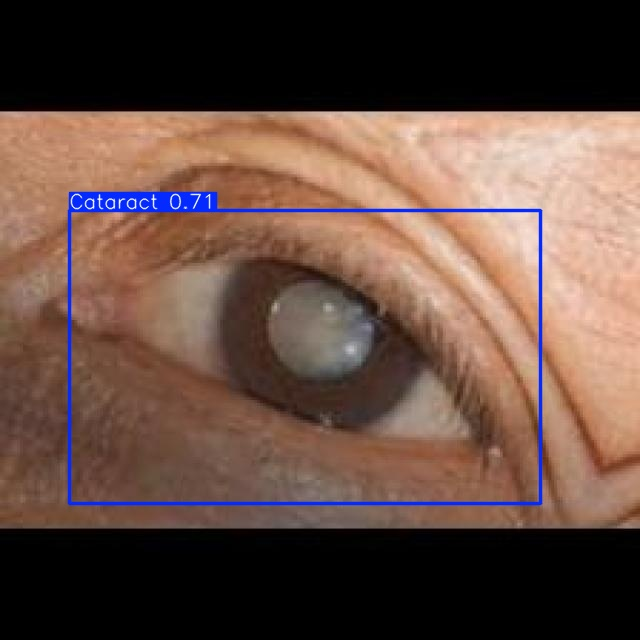

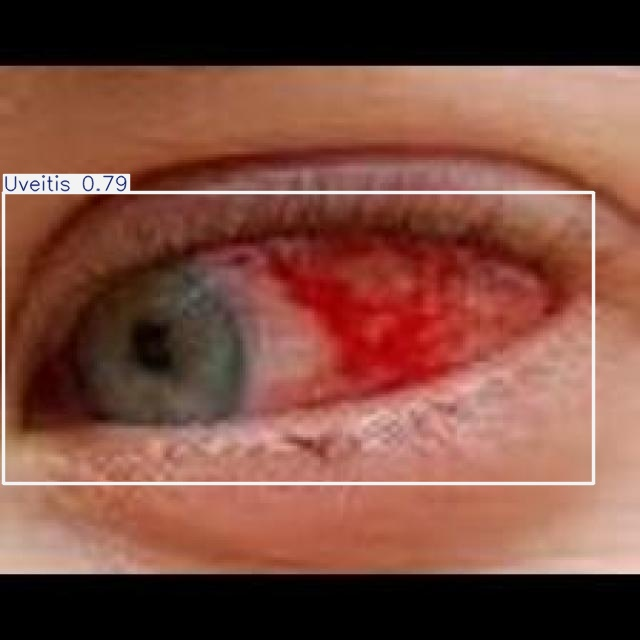

In [28]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")